# Analiza piosenek

Dominika Wiśniewska

## Wstęp

Źródło danych: https://www.kaggle.com/datasets/refiaozturk/spotify-songs-dataset (pobierane w momencie uruchomienia programu)

Kolumny:


*   song_id
*   song_title
*   artist
*   album
*   genre
*   release_date
*   duration
*   popularity
*   stream
*   language
*   explicit_content
*   label
*   composer
*   producer
*   collaboration


### Importowanie bibliotek

In [ ]:
install.packages("viridis")
install.packages("tidyverse")
install.packages("dplyr")
install.packages("RColorBrewer")
install.packages("reshape2")
install.packages("patchwork")
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ggstats’




In [ ]:
library(tidyverse)
library(dplyr)
library(RColorBrewer)
library(viridis)
library(reshape2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




### Wczytanie danych

In [ ]:
# Sprawdź, czy folder "data" istnieje, jeśli nie - utwórz go
if (!dir.exists("data")) {
  dir.create("data")
}

# Jeśli plik CSV nie istnieje, pobierz go
if (!file.exists("data/spotify_songs_dataset.csv")) {
  # Instalacja wymaganych pakietów
  install.packages(c("devtools"))
  devtools::install_github("ldurazo/kaggler")

  # Załadowanie bibliotek
  library(readr)
  library(kaggler)

  # Uwierzytelnianie w Kaggle
  kgl_auth(username = "dominikawiniewska", key = "5d24436e5518b1612c5d7e34300cf354")

  # Pobranie danych z Kaggle
  response <- kgl_datasets_download_all(owner_dataset = "refiaozturk/spotify-songs-dataset")

  # Pobranie pliku ZIP
  download.file(response[["url"]], "data/temp.zip", mode = "wb")

  # Rozpakowanie pliku ZIP
  unzip_result <- unzip("data/temp.zip", exdir = "data/", overwrite = TRUE)
}

# Wczytanie danych
df <- read_csv("data/spotify_songs_dataset.csv")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




curl (6.1.0 -> 6.2.0) [CRAN]


Installing 1 packages: curl

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpyAw0Fy/remotes2315186f764/ldurazo-kaggler-bfb8fb6/DESCRIPTION’ ... OK
* preparing ‘kaggler’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘kaggler_0.0.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Your Kaggle key has been recorded for this session and saved as `KAGGLE_PAT`
  environment variable for future sessions.

Rows: 50000 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (11): song_id, song_title, artist, album, genre, language, explicit_con...
dbl   (3): duration, popularity, stream
date  (1): release_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
#df <- read_csv("spotify_songs_dataset.csv")

# Wstępna obróbka

In [ ]:
head(df)

song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NA
SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NA
SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NA,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NA
SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NA
SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NA
SP0006,Whatever Mr send.,Nathan King,Various experience.,Folk,2015-11-29,312,74,82613530,NA,Yes,Indie,Brad Hicks,John Brown,NA


In [ ]:
sum(is.na(df))

[1] 42500

In [ ]:
df$collaboration[is.na(df$collaboration)] <- "None"

In [ ]:
sum(is.na(df))

[1] 7500

In [ ]:
df <- na.omit(df)
head(df)

song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,None
SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,None
SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,None
SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,None
SP0007,Each leg.,Joshua Santos,Determine.,Hip-Hop,1996-03-16,336,49,88337653,Japanese,No,Def Jam,Henry Willis,William Smith,None
SP0008,Person then enjoy.,Leonard Brown,Sense lot.,Hip-Hop,2017-08-14,237,9,95988275,English,No,Atlantic Records,Keith Horton,Justin Gonzalez,None


In [ ]:
str(df)

tibble [42,744 × 15] (S3: tbl_df/tbl/data.frame)
 $ song_id         : chr [1:42744] "SP0001" "SP0002" "SP0004" "SP0005" ...
 $ song_title      : chr [1:42744] "Space executive series." "Price last painting." "Power industry your." "Food animal second." ...
 $ artist          : chr [1:42744] "Sydney Clark" "Connor Peters DDS" "Zachary Simpson" "Christopher Mcgee" ...
 $ album           : chr [1:42744] "What." "Nature politics." "Behavior evening." "Front." ...
 $ genre           : chr [1:42744] "Electronic" "Electronic" "Hip-Hop" "Pop" ...
 $ release_date    : Date[1:42744], format: "1997-11-08" "2015-05-10" ...
 $ duration        : num [1:42744] 282 127 214 273 336 237 216 161 345 131 ...
 $ popularity      : num [1:42744] 42 50 86 63 49 9 2 81 88 73 ...
 $ stream          : num [1:42744] 35055874 9249527 34732016 96649372 88337653 ...
 $ language        : chr [1:42744] "English" "English" "English" "English" ...
 $ explicit_content: chr [1:42744] "Yes" "Yes" "No" "Yes" ...
 $ label   

In [ ]:
numeric_cols <- c("duration", "popularity", "stream")

In [ ]:
df$duration <- as.integer(df$duration)
df$popularity <- as.integer(df$popularity)
df$stream <- as.integer(df$stream)

Zmiana typów zmiennych dla kolumn numerycznych

In [ ]:
head(df)

song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,None
SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,None
SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,None
SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,None
SP0007,Each leg.,Joshua Santos,Determine.,Hip-Hop,1996-03-16,336,49,88337653,Japanese,No,Def Jam,Henry Willis,William Smith,None
SP0008,Person then enjoy.,Leonard Brown,Sense lot.,Hip-Hop,2017-08-14,237,9,95988275,English,No,Atlantic Records,Keith Horton,Justin Gonzalez,None


# Analiza podstawowa

In [ ]:
numeric_cols <- c("duration", "popularity", "stream")
summary <- summary(df[numeric_cols])

summary_rounded <- lapply(df[numeric_cols], function(x) round(summary(x), 2))
summary_rounded

$duration
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   33.0   206.0   240.0   239.7   274.0   433.0 

$popularity
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    26.0    51.0    50.8    76.0   100.0 

$stream
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1899 25294101 50562992 50237340 75191077 99999128 


# Statystyki pojedynczych zmiennych

## Explicit content

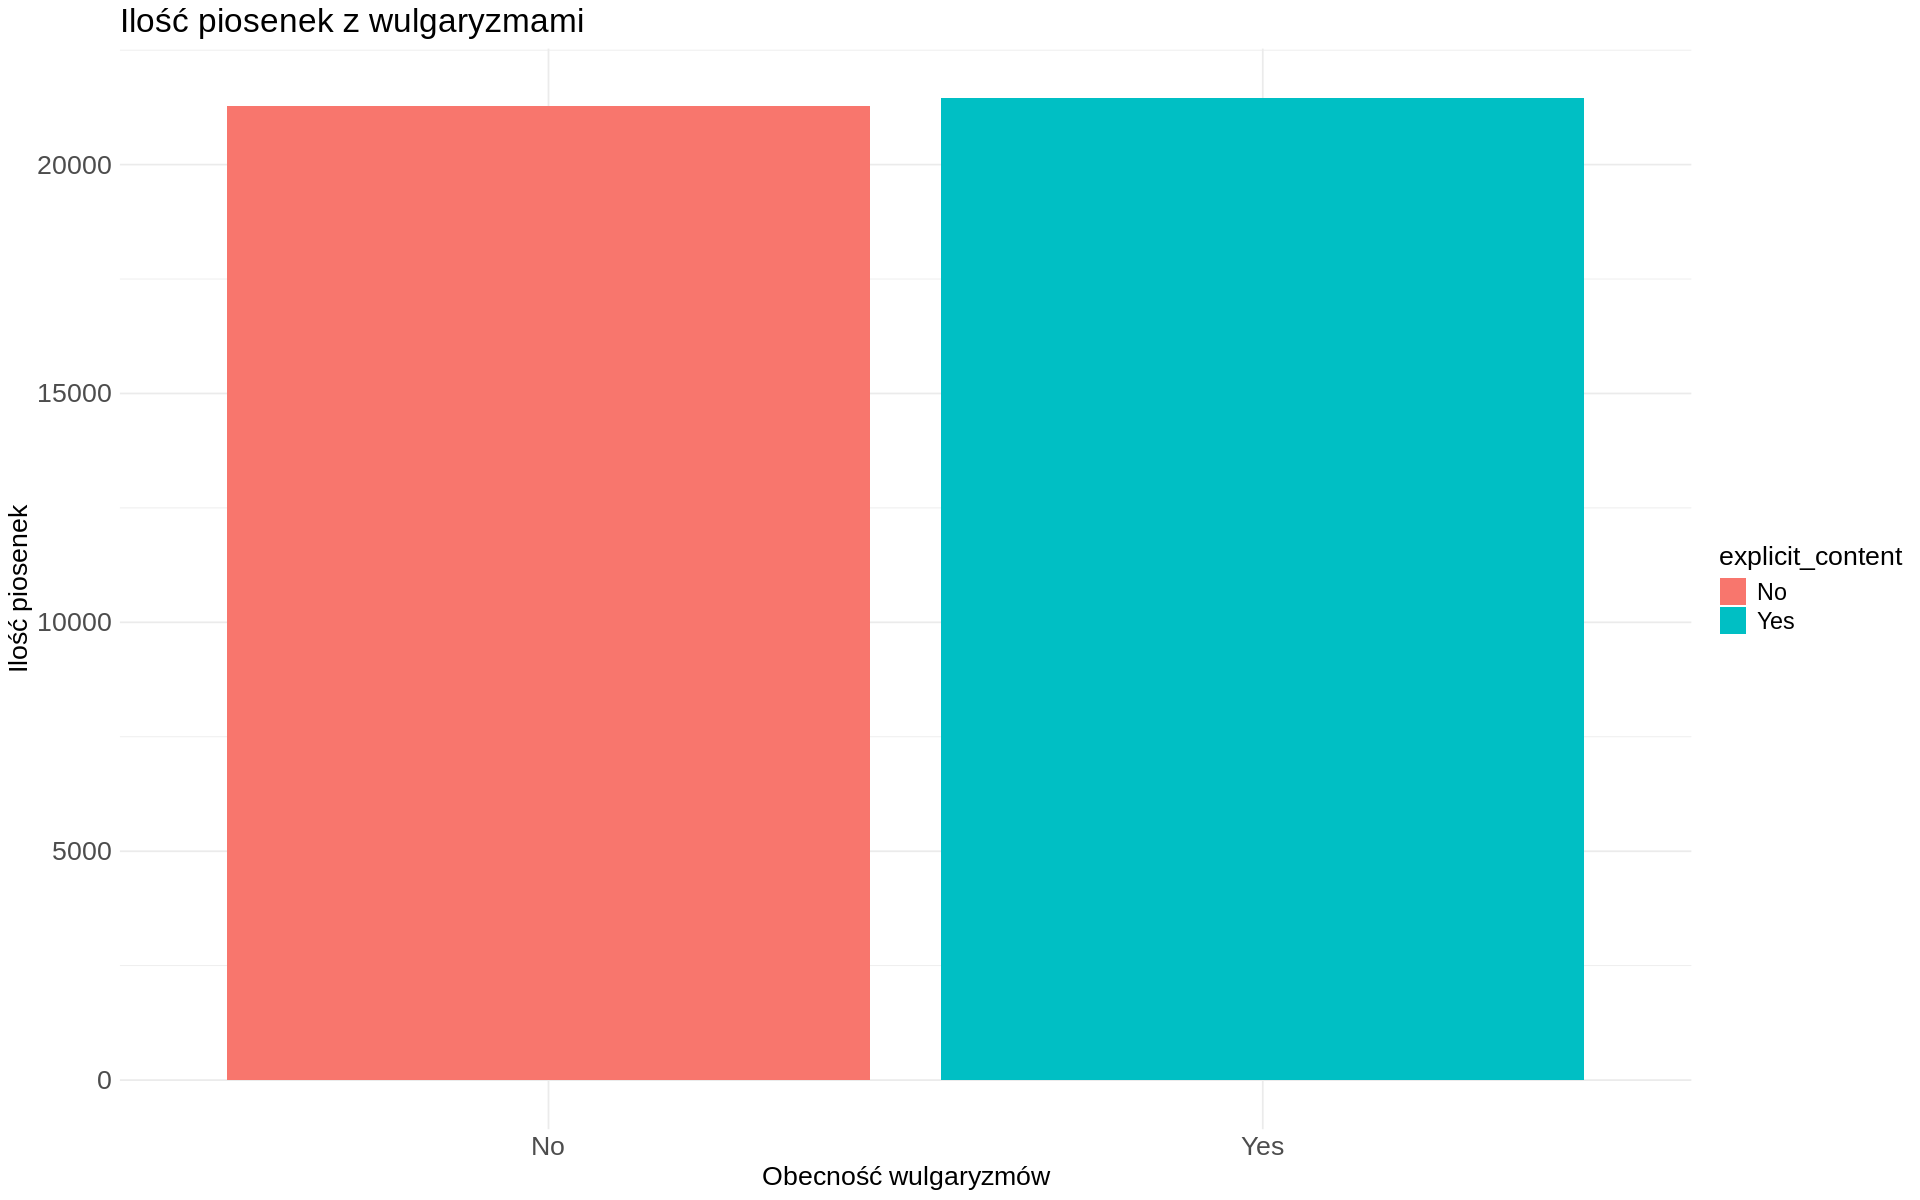

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(df, aes(x = explicit_content, fill = explicit_content)) +
  geom_bar() +
  ggtitle("Ilość piosenek z wulgaryzmami") +
  xlab("Obecność wulgaryzmów") +
  ylab("Ilość piosenek") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

**Wnioski:**

Ilość piosenek z wulgaryzmami jest bardzo zbliżona do ilośc tych bez wulgaryzmów

## **Genre**

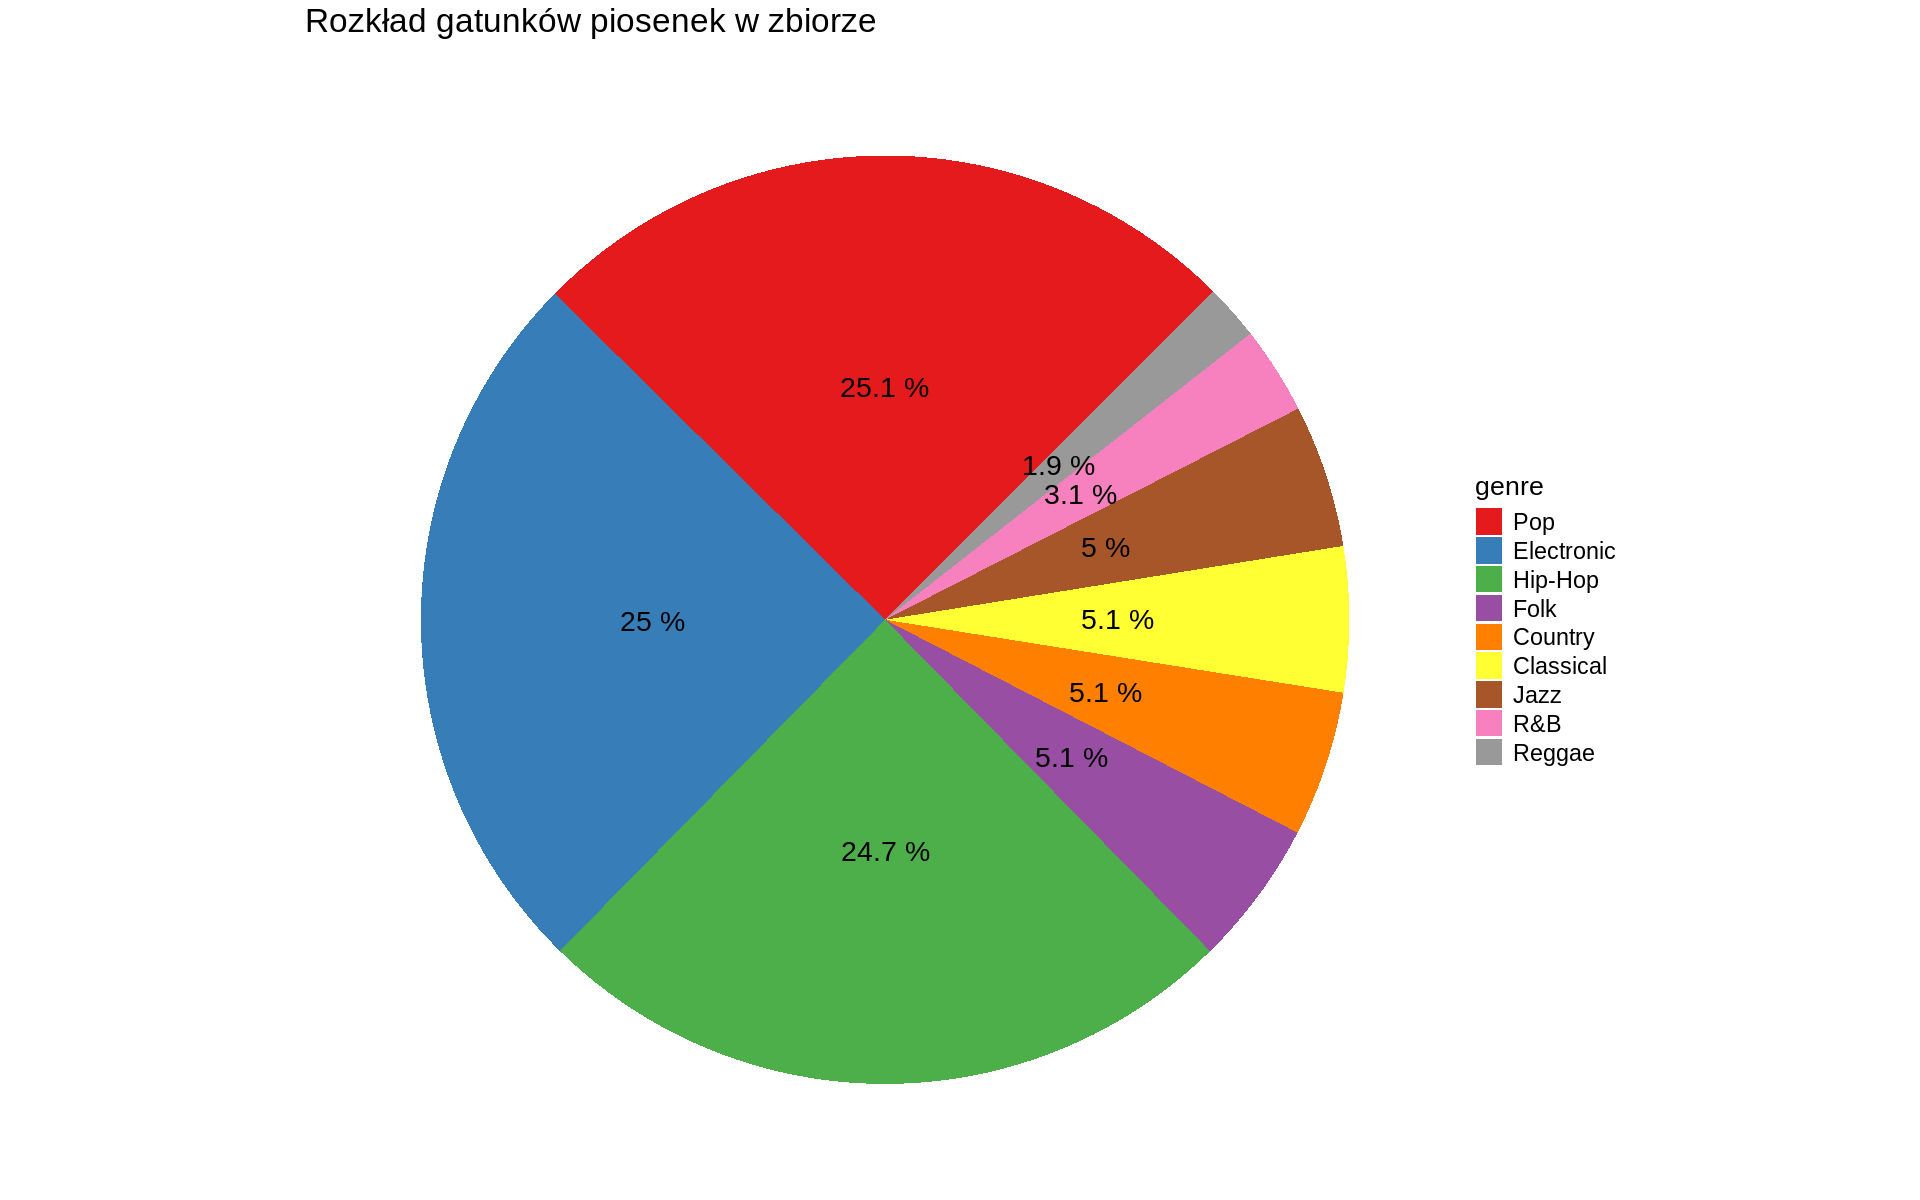

In [ ]:
genre_counts <- table(df$genre)

genre_df <- data.frame(genre = names(genre_counts), count = as.vector(genre_counts))

genre_df$percentage <- round(100 * genre_df$count / sum(genre_df$count), 1)
genre_df$genre <- factor(genre_df$genre, levels = genre_df$genre[order(genre_df$count, decreasing = TRUE)])

ggplot(genre_df, aes(x = "", y = count, fill = genre)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y", start = pi / 4) +
  geom_text(aes(label = paste(percentage, "%")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 6,
   ) +
  ggtitle("Rozkład gatunków piosenek w zbiorze") +
  scale_fill_brewer(palette = "Set1")+
  theme_void()+
  theme(
    plot.title = element_text(size = 20),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

**Wnioski:**

Najpopuarniejszymi gatunkami muzycznymi są Pop, Electronic i Hip-Hop.

Najmniejszą popularnością cieszą się: Reagge, R&B i Jazz

## **Language**

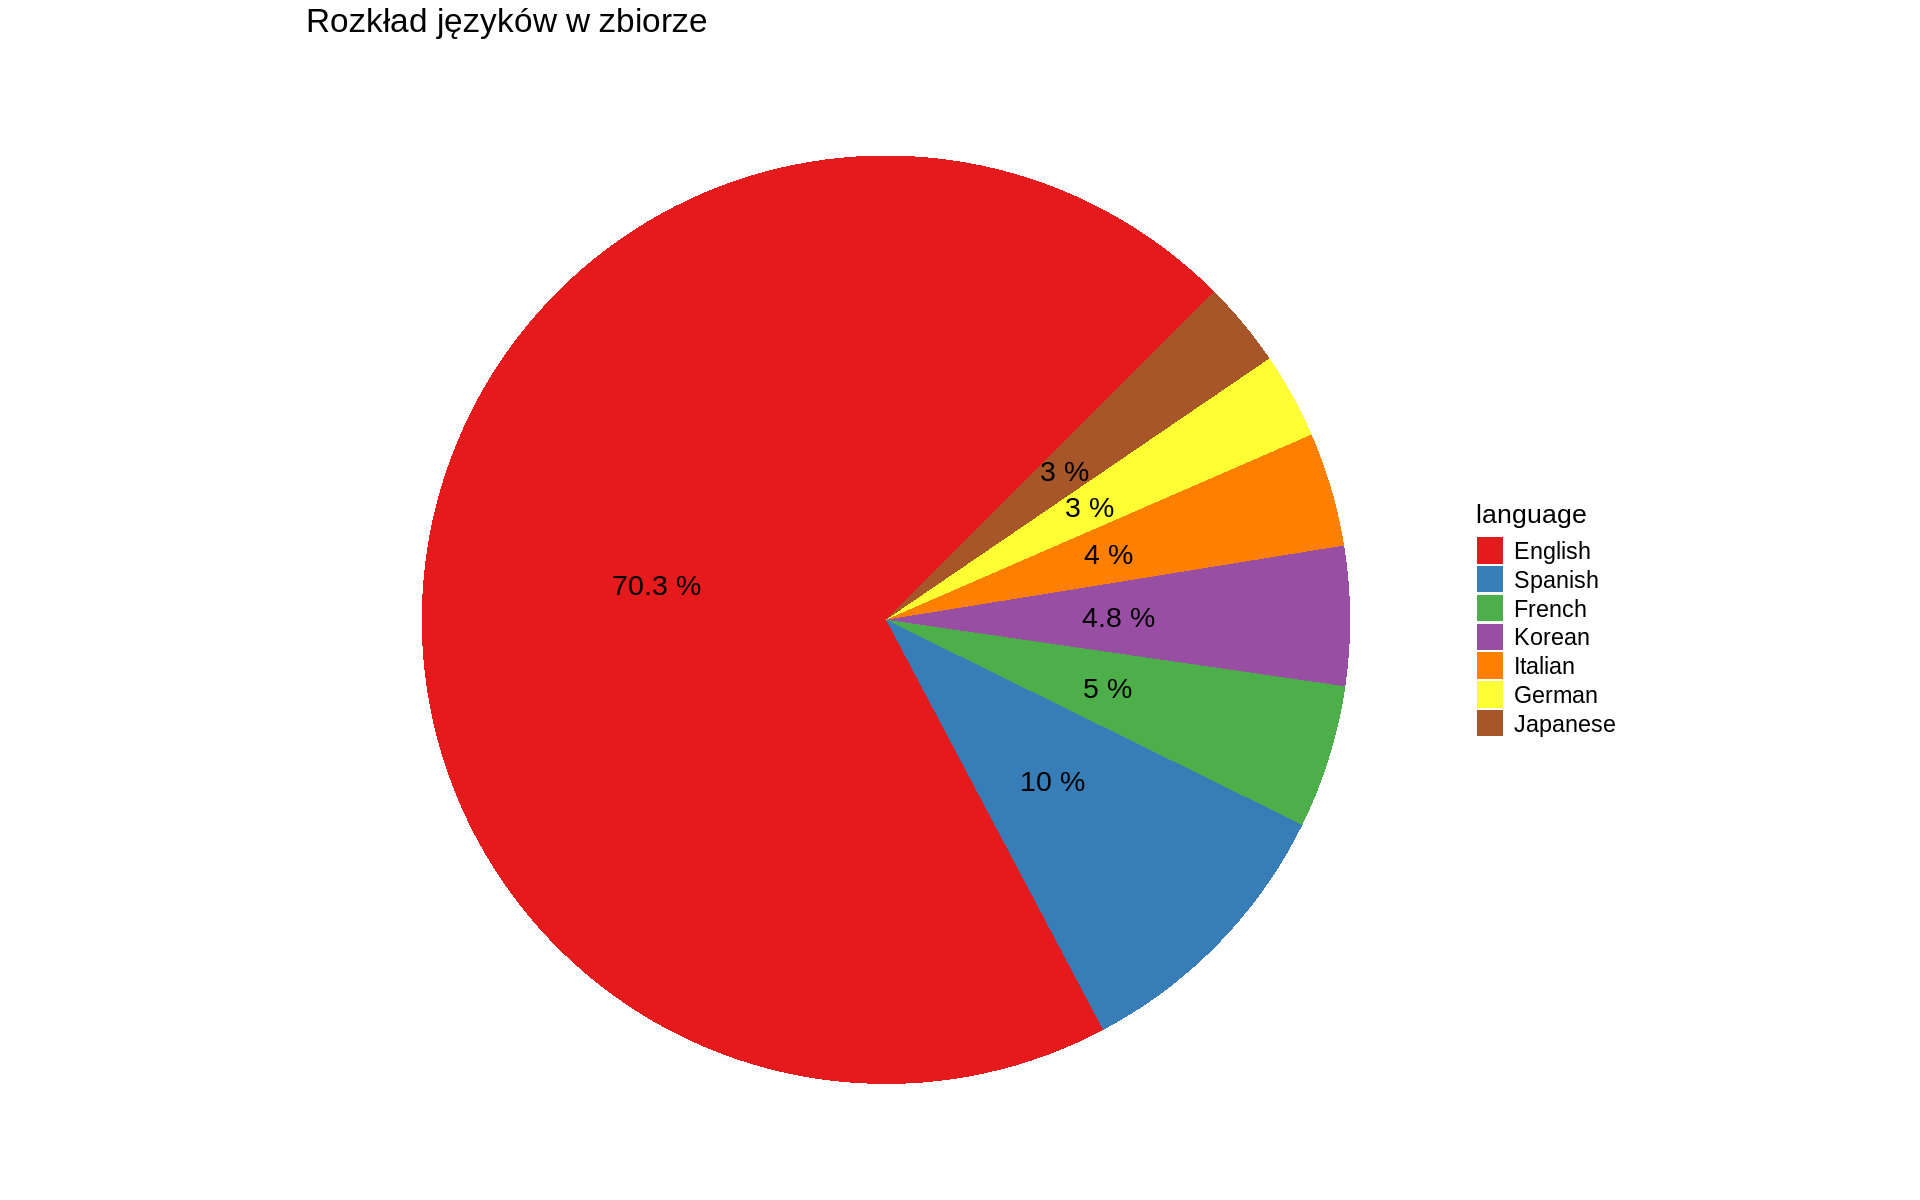

In [ ]:
language_counts <- table(df$language)

language_df <- data.frame(language = names(language_counts), count = as.vector(language_counts))

language_df$percentage <- round(100 * language_df$count / sum(language_df$count), 1)
language_df$language <- factor(language_df$language, levels = language_df$language[order(language_df$count, decreasing = TRUE)])

ggplot(language_df, aes(x = "", y = count, fill = language)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y", start = pi / 4) +
  geom_text(aes(label = paste(percentage, "%")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 6) +
  ggtitle("Rozkład języków w zbiorze") +
  theme_void() +
  scale_fill_brewer(palette = "Set1") +
  theme(
    plot.title = element_text(size = 20),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

**Wnioski:**

Zdecydowanie dominującym językiem piosenek jest angielski, występuje w niemalże 3/4 wszystkich utworów.

## **Duration**

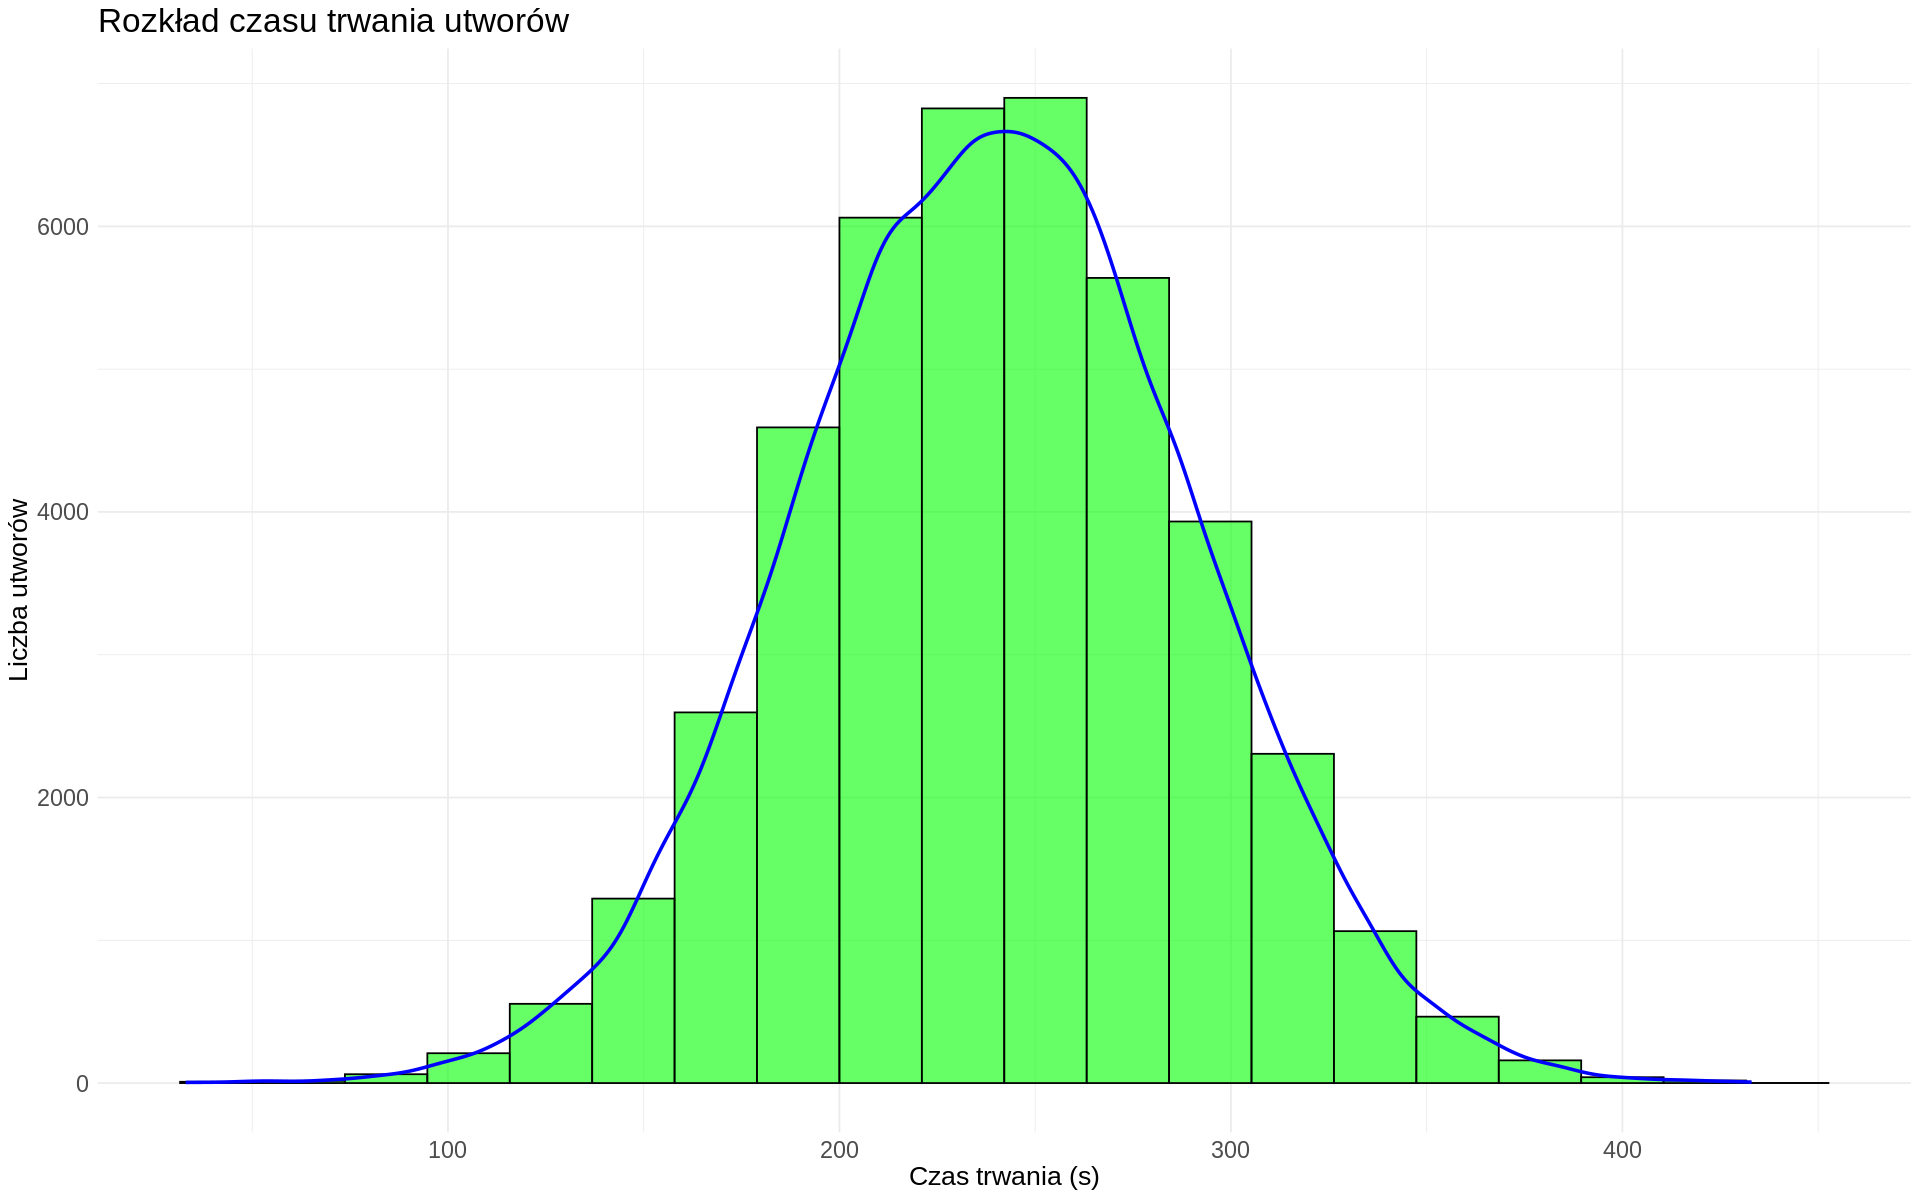

In [ ]:
ggplot(df, aes(x = duration)) +
  geom_histogram(aes(y = after_stat(count)), bins = 20, fill = "green", color = "black", alpha = 0.6) +
  geom_density(aes(y = after_stat(density) * length(df$duration) * diff(range(df$duration)) / 20),
               color = "blue", linewidth = 1) +
  ggtitle("Rozkład czasu trwania utworów") +
  xlab("Czas trwania (s)") +
  ylab("Liczba utworów") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14)
  )

**Wnioski:**

Większość piosenek trwa około 250 sekund, czyli 4 minuty 10 sekund

# Ilość piosenek zawierających wulgaryzmy

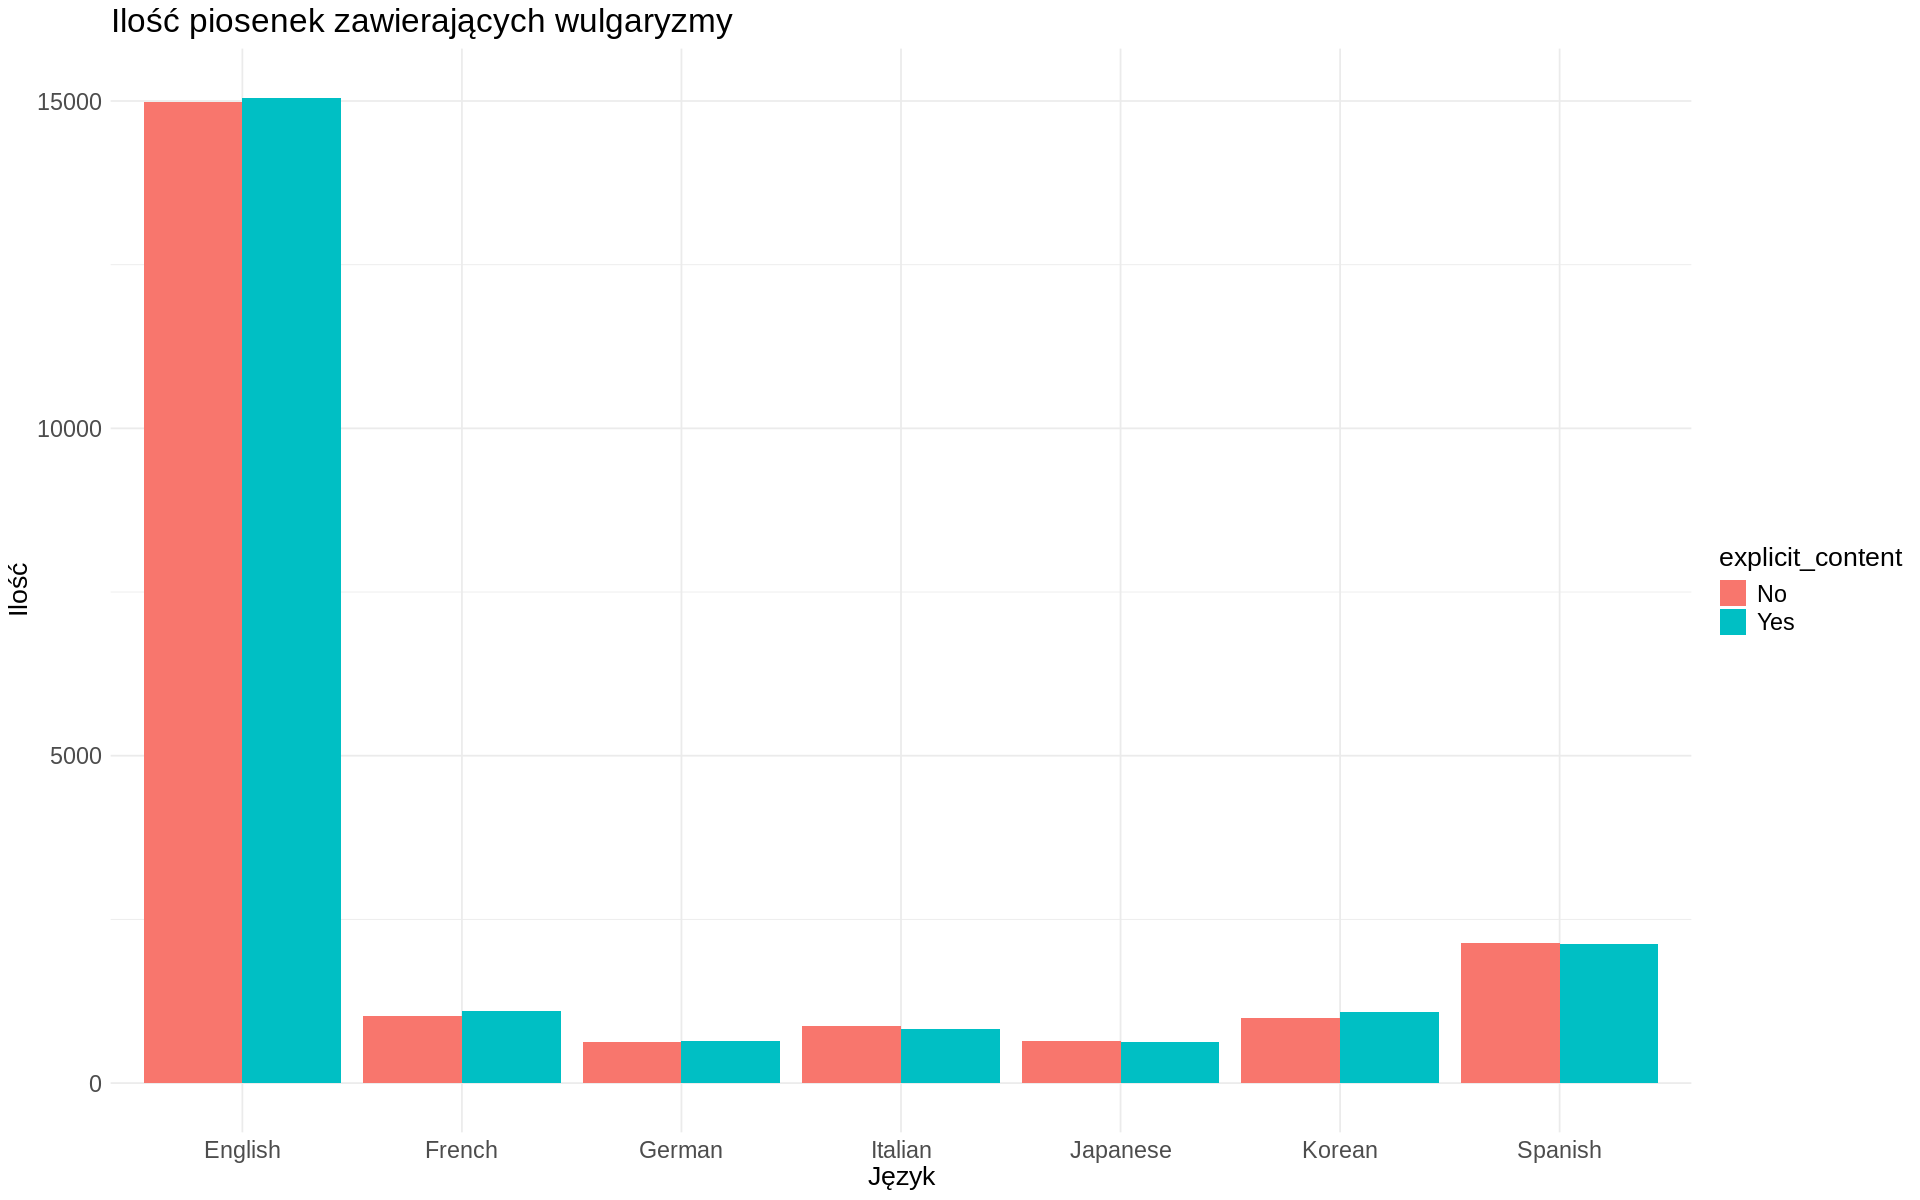

In [ ]:
ggplot(df, aes(x = language, fill = explicit_content)) +
  geom_bar(position = "dodge") +
  ggtitle("Ilość piosenek zawierających wulgaryzmy") +
  xlab("Język") +
  ylab("Ilość") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

**Wnioski:**

W wszystkich językach ilości piosenek z wulgaryzmami i bez nich są podobne do siebie.

W językach: angielskim, koreańskim i francuskim nieznacznie dominują piosenki zawierające wulgaryzmy.

W języku włoskim nieznacznie przeważają piosenki nieposiadające wulgaryzmów.

# Ilość piosenek wyprodukowanych w poszczególnych językach dla każdej z dekad - bez uwzględnienia angielskiego

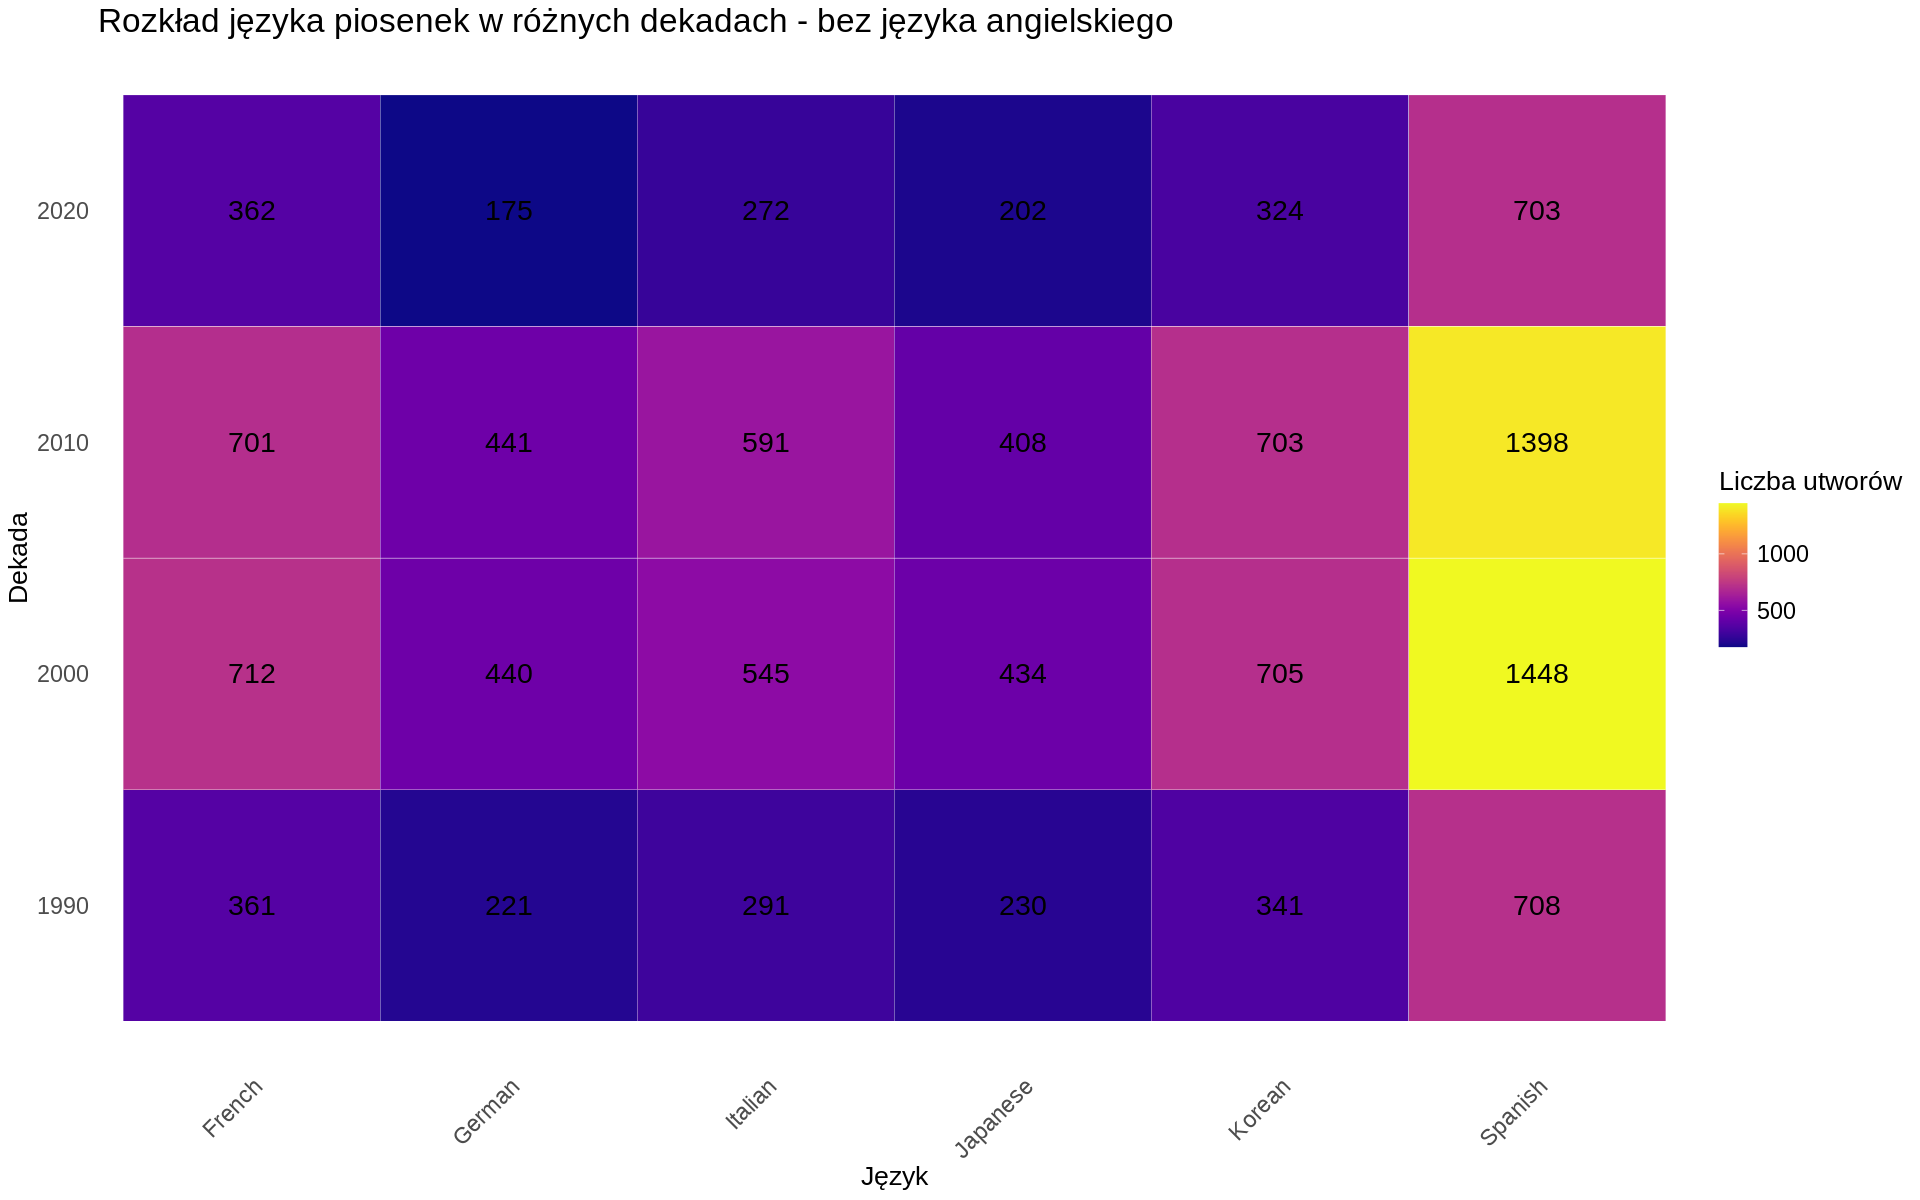

In [ ]:
df$release_year <- format(as.Date(df$release_date, format = "%Y-%m-%d"), "%Y")
df$release_year <- as.numeric(df$release_year)
df$decade <- (df$release_year %/% 10) * 10

data <- df %>% filter(language != "English")

heatmap_data <- data %>%
  group_by(decade, language) %>%
  summarise(count = n(), .groups = 'drop') %>%
  pivot_wider(names_from = language, values_from = count, values_fill = 0)

heatmap_df <- heatmap_data %>%
  pivot_longer(
    cols = -decade,
    names_to = "Language",
    values_to = "Count"
  )

ggplot(heatmap_df, aes(x = Language, y = decade, fill = Count)) +
  geom_tile(color = "white") +
  scale_fill_viridis(option = "C", name = "Liczba utworów") +
  geom_text(aes(label = Count), color = "black", size = 6) +
  labs(
    title = "Rozkład języka piosenek w różnych dekadach - bez języka angielskiego",
    x = "Język",
    y = "Dekada"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

**Wnioski:**

Nie uwzględniamy języka angielskiego dla lepszej widoczności danych.

W latach 2000. ilość piosenek we wszystich językach mniej więcej podwoiła się względem poprzedniej dekady.

Najbardziej dominującym językiem jest hiszpański, po nim koreański i francuski.

## Piosenki zawierające kolaborację

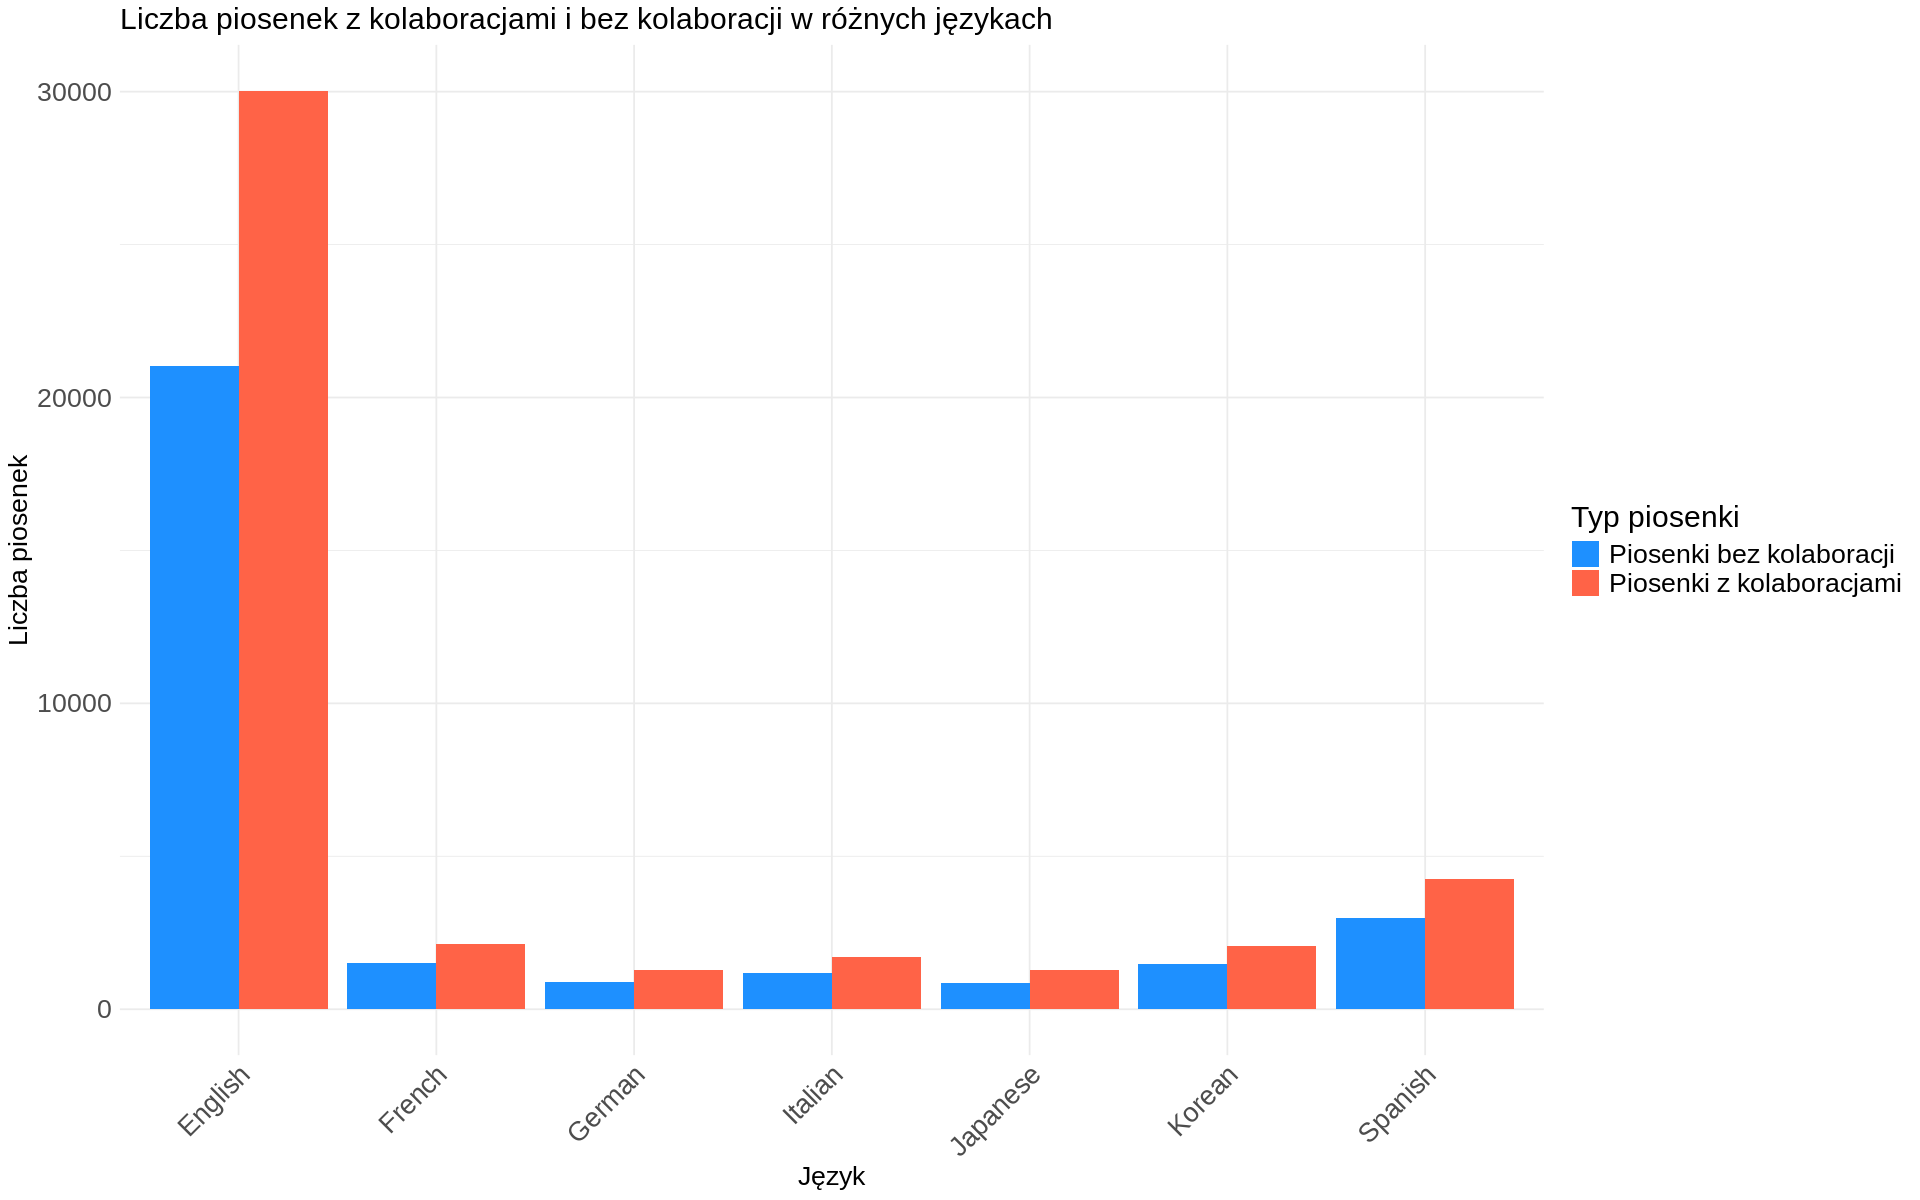

In [ ]:
data_w_collab <- df %>% filter(!is.na(collaboration))
data_wo_collab <- df %>% filter(collaboration == "None")

collab_count <- data_w_collab %>% count(language, name = "Piosenki z kolaboracjami")
no_collab_count <- data_wo_collab %>% count(language, name = "Piosenki bez kolaboracji")

collab_summary <- full_join(collab_count, no_collab_count, by = "language") %>%
  replace(is.na(.), 0)

collab_summary_long <- collab_summary %>%
  pivot_longer(cols = c("Piosenki z kolaboracjami", "Piosenki bez kolaboracji"),
               names_to = "Typ_piosenki",
               values_to = "Liczba_piosenek")

ggplot(collab_summary_long, aes(x = language, y = Liczba_piosenek, fill = Typ_piosenki)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = c("dodgerblue", "tomato")) +
  labs(
    title = "Liczba piosenek z kolaboracjami i bez kolaboracji w różnych językach",
    x = "Język",
    y = "Liczba piosenek",
    fill = "Typ piosenki"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1,size=16),
    axis.text.y = element_text(size=16),
    plot.title = element_text(size = 18),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 16)
  )

**Wnioski:**

Większość piosenek to kolaboracja z innymi artystami

Trend ten jest widoczny we wszystkich językach

# Średnia popularność gatunków muzycznych w różnych dekadach

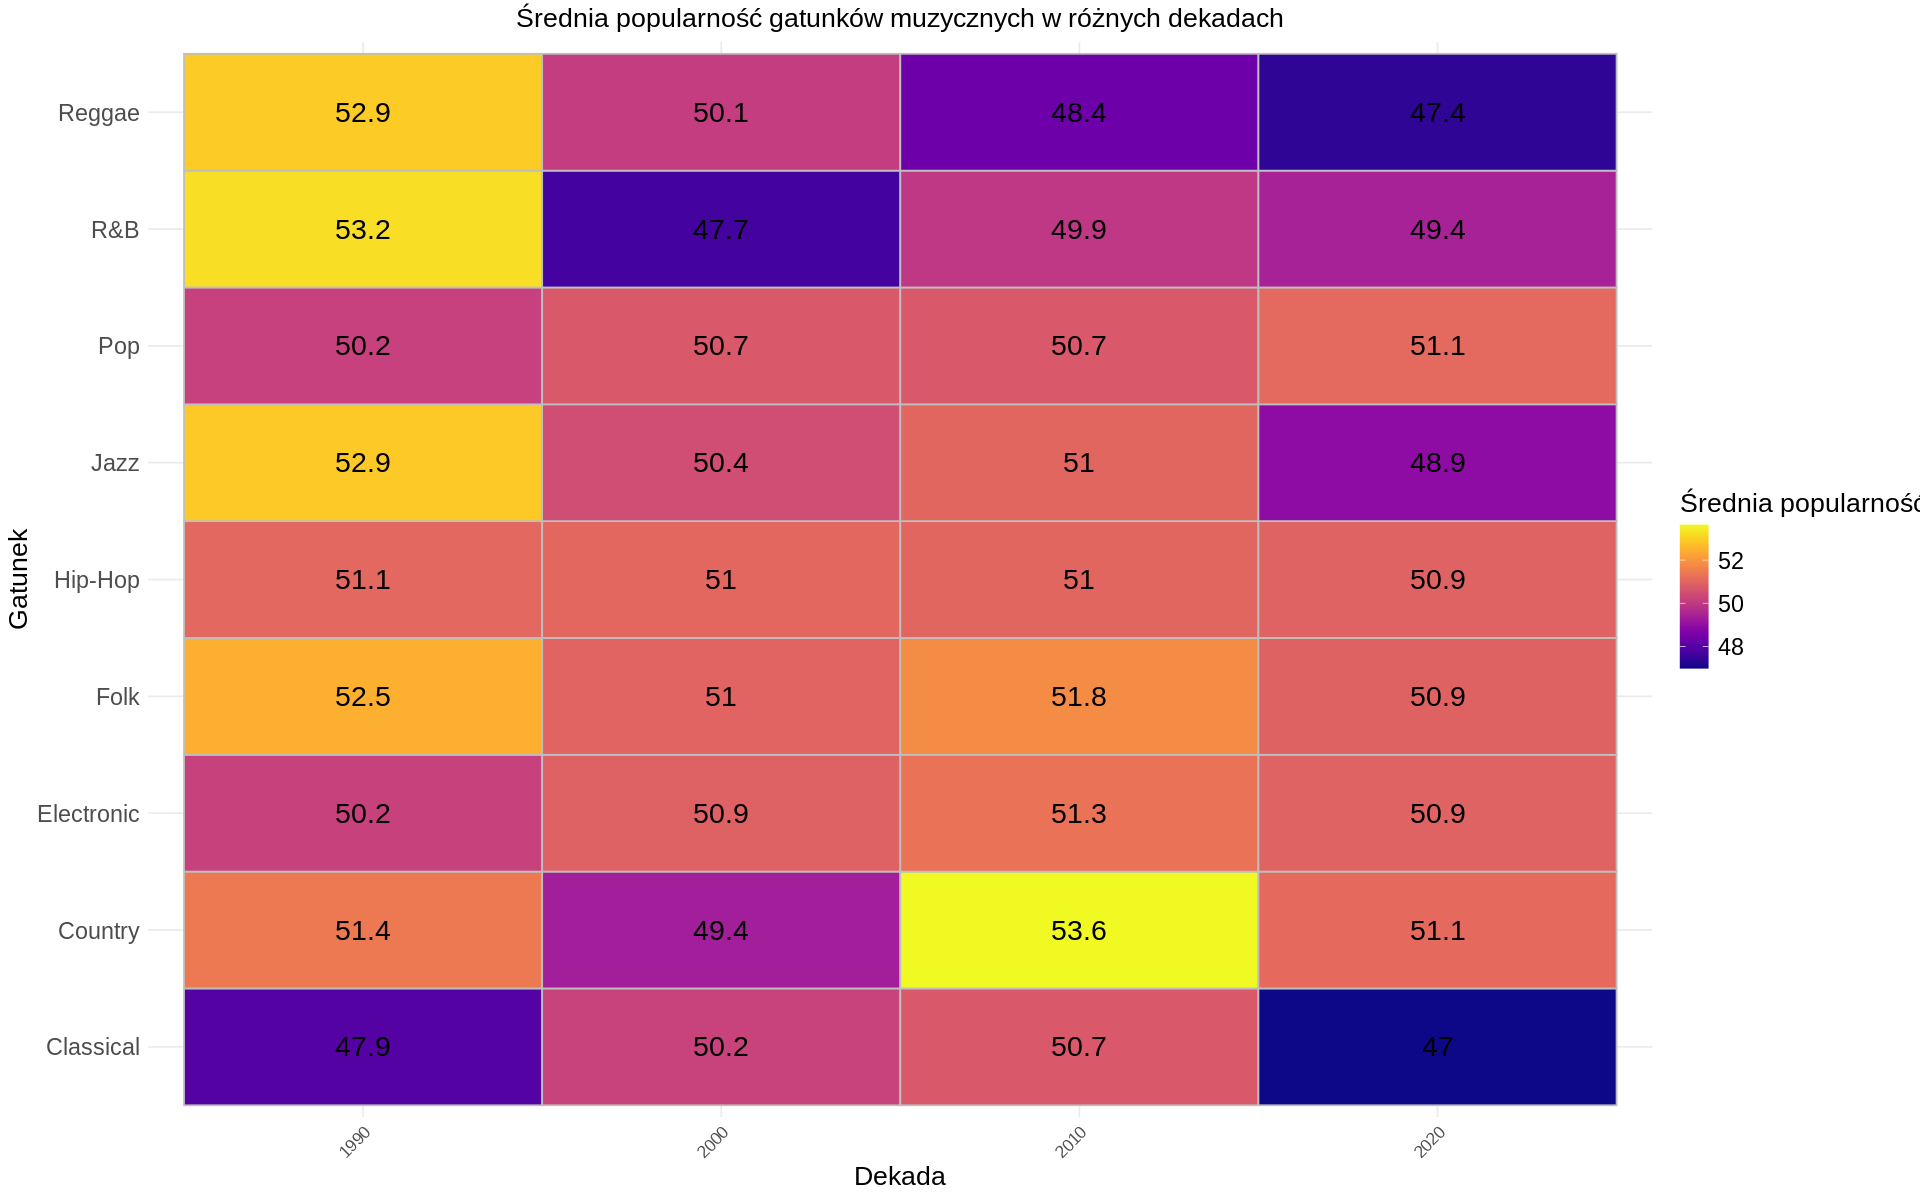

In [ ]:
df$release_year <- as.numeric(format(as.Date(df$release_date, format = "%Y-%m-%d"), "%Y"))
df$decade <- (df$release_year %/% 10) * 10

genre_decade_popularity <- df %>%
  group_by(decade, genre) %>%
  summarise(popularity = mean(popularity, na.rm = TRUE), .groups = "drop")

heatmap_data <- genre_decade_popularity %>%
  pivot_wider(names_from = decade, values_from = popularity, values_fill = 0)

heatmap_long <- melt(heatmap_data, id.vars = "genre")

ggplot(heatmap_long, aes(x = variable, y = genre, fill = value)) +
  geom_tile(color = "gray", linewidth = 0.5) +
  geom_text(aes(label = round(value, 1)), color = "black", size = 6) +  # Dodanie liczb
  scale_fill_viridis(option = "C",name = "Średnia popularność") +
  labs(
    title = "Średnia popularność gatunków muzycznych w różnych dekadach",
    x = "Dekada",
    y = "Gatunek"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
    axis.text.y = element_text(size = 14),
    plot.title = element_text(size = 16, hjust = 0.5),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

**Wnioski:**

W latach 90. najpopularniejsze były Reggae, R&B i Jazz

W latach 2000. najpopularniejsze były Hip-Hop, folk i muzyka elektroniczna

W latach 2011-2020 najpopularniejsze były muzyka Country i folk

W latach 2021 do teraz najpopularniejsze były Pop i muzyka Country

# Średnia popularność piosenki w zależności od języka i gatunku

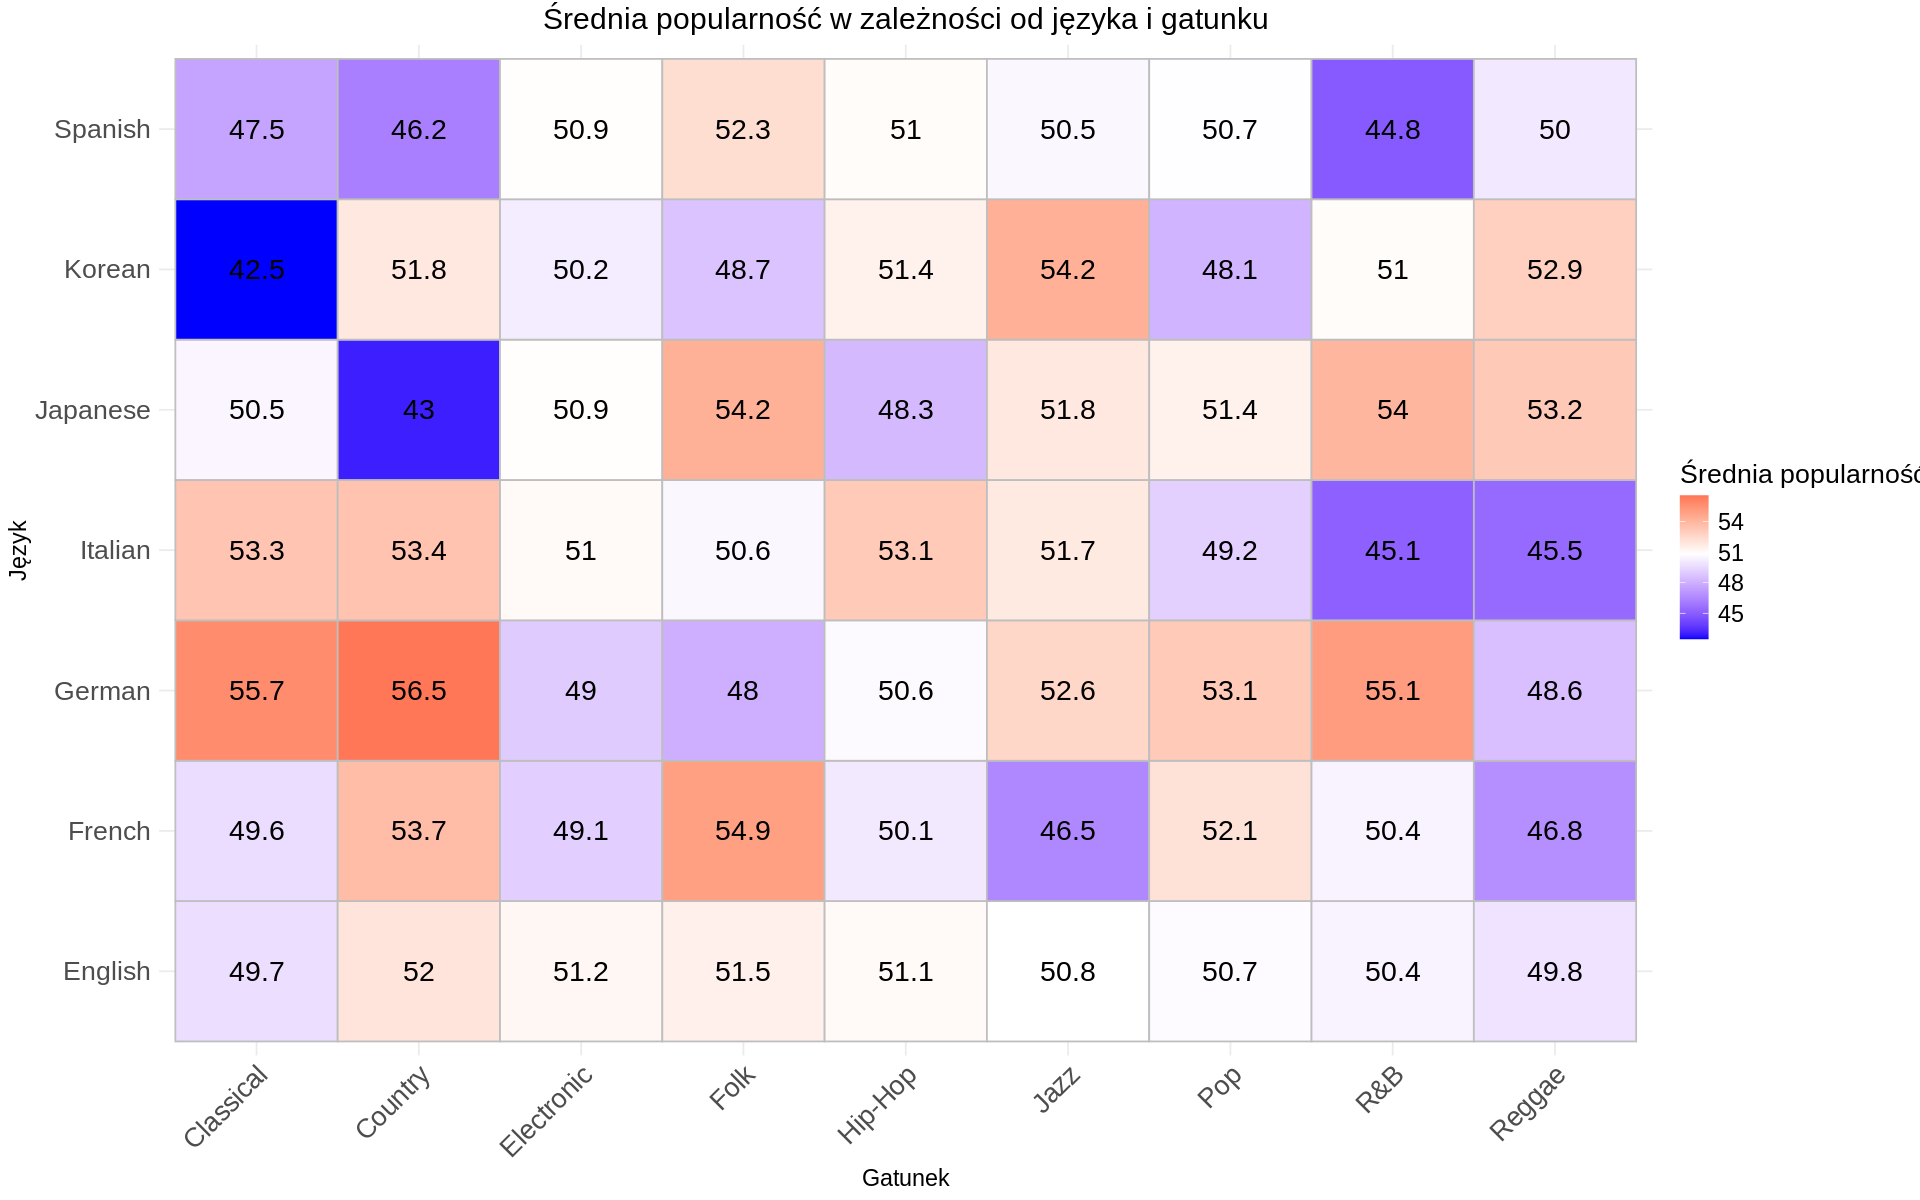

In [ ]:
data <- df %>%
  group_by(language, genre) %>%
  summarise(popularity = mean(popularity, na.rm = TRUE), .groups = 'drop')

heatmap_data <- data %>%
  pivot_wider(names_from = genre, values_from = popularity, values_fill = 0)

heatmap_long <- melt(heatmap_data, id.vars = "language")

ggplot(heatmap_long, aes(x = variable, y = language, fill = value)) +
  geom_tile(color = "gray", linewidth = 0.5) +
  geom_text(aes(label = round(value, 1)), color = "black", size = 6) +
  scale_fill_gradient2(
    low = "blue",
    mid = "white",
    high = "red",
    midpoint = median(heatmap_long$value, na.rm = TRUE),
    name = "Średnia popularność"
  ) +
  labs(
    title = "Średnia popularność w zależności od języka i gatunku",
    x = "Gatunek",
    y = "Język"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
    axis.text.y = element_text(size = 16),
    plot.title = element_text(size = 18, hjust = 0.5),
    axis.title = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

**Wnioski:**
*   Najpopularniejsze są piosenki Country i muzyki klasycznej w języku niemieckim
*   Wysoką popularność ma też folk po francusku, R&B po niemiecku czy jazz po koreańsku


*   Najmniej popularne są piosenki Country w języku japońskim oraz muzyka klasyczna po koreańsku
*   Mało popularne są jest też m.in. R&B po hiszpańsku i włosku


W angielskim żaden gatunek się za bardzo nie wyróżnia, najpewniej spowodowane bardzo dużą ilością piosenek w tym języku

# Zmiany następujące na przestrzeni lat

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


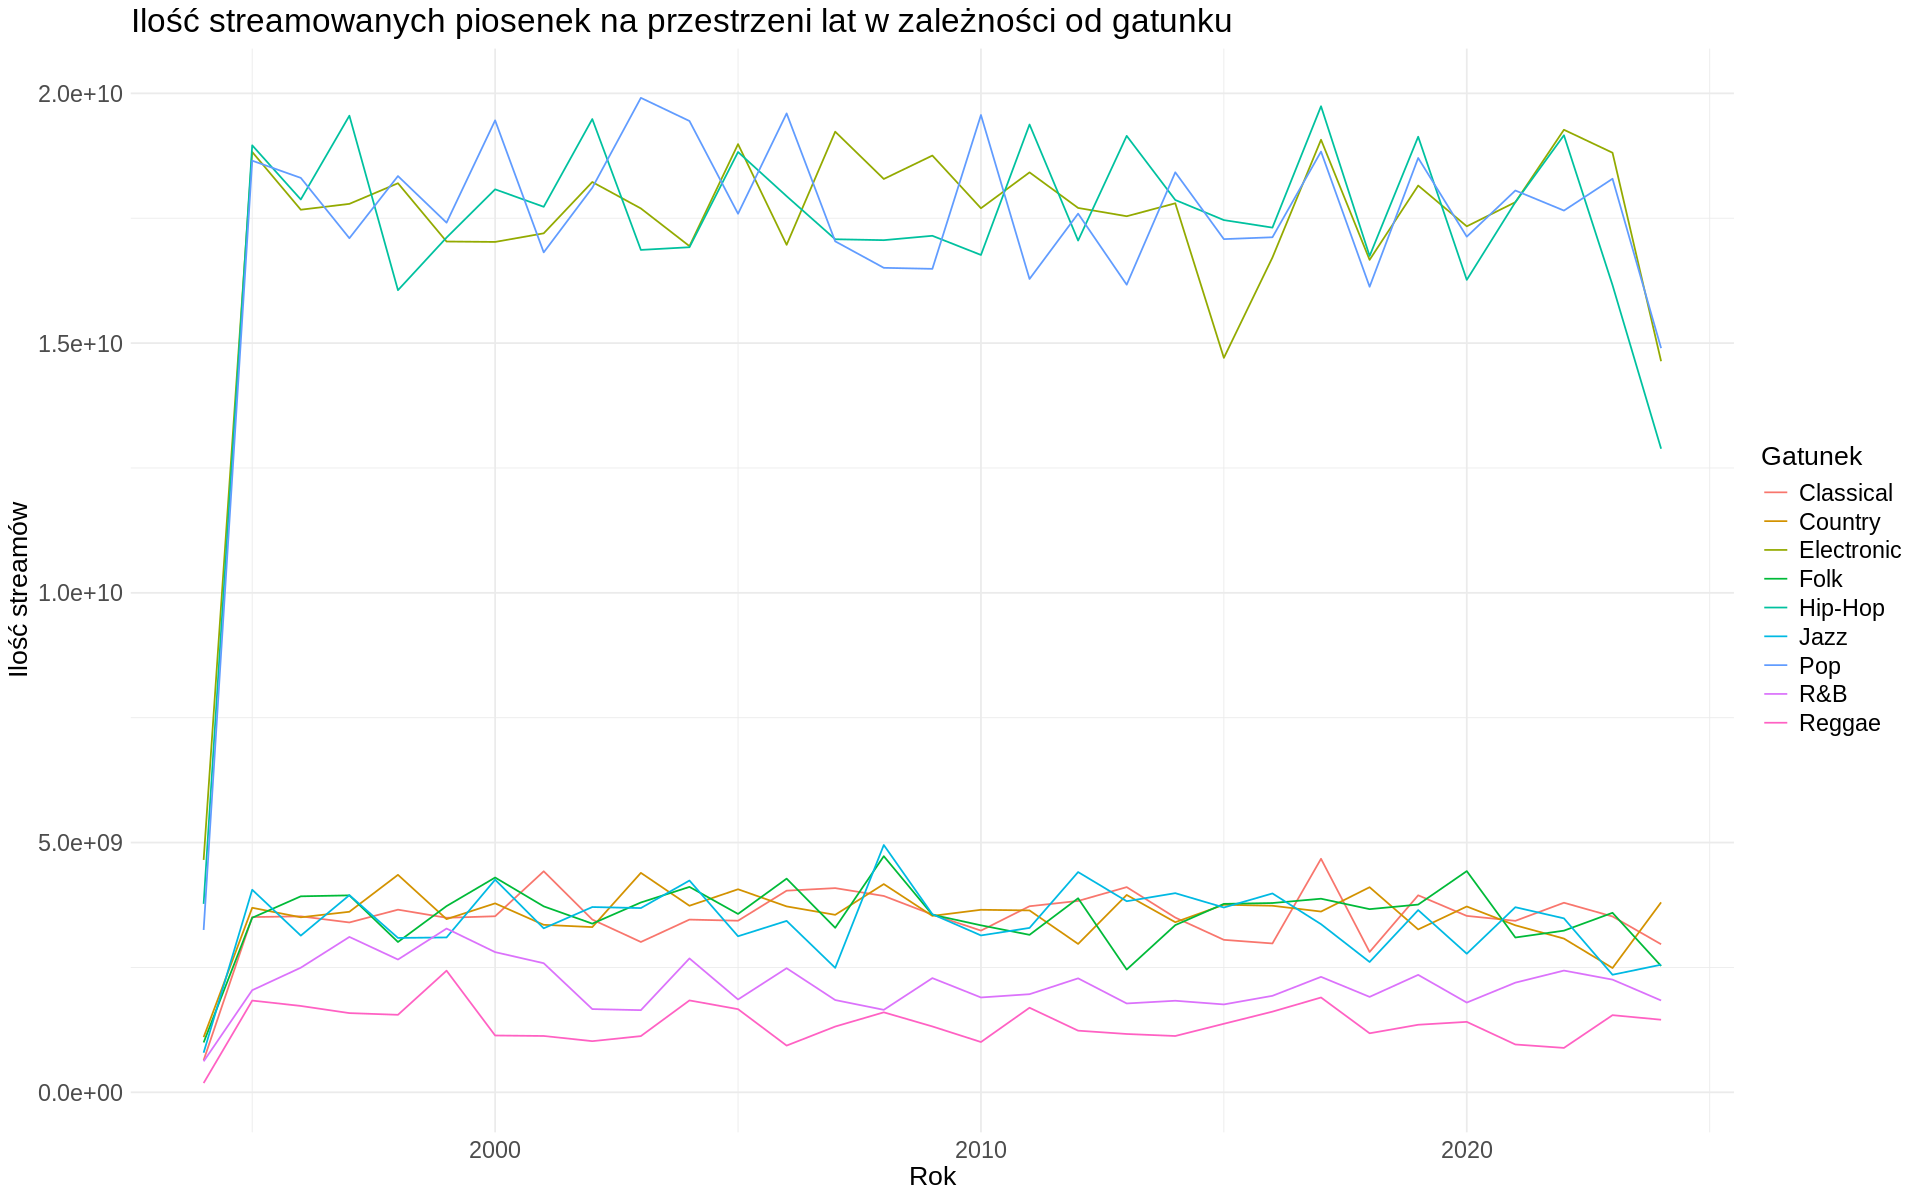

In [ ]:
library(dplyr)
library(ggplot2)


df1 <- df %>%
  select(release_date, stream, genre) %>%
  mutate(release_date = as.Date(release_date),
         year = format(release_date, "%Y")) %>%
  group_by(year, genre) %>%
  summarise(total_stream = sum(stream, na.rm = TRUE)) %>%
  ungroup()

ggplot(df1, aes(x = as.numeric(year), y = total_stream, color = genre)) +
  geom_line() +
  labs(
    title = "Ilość streamowanych piosenek na przestrzeni lat w zależności od gatunku",
    x = "Rok",
    y = "Ilość streamów",
    color = "Gatunek"
  ) +
  theme_minimal()+
  theme(
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )


**Wnioski:**

* Ilości streamowanych piosenek na przestrzeni lat nie zmieniają się zbytnio, może to wynikać z tego, że zbiór został wygenerowany przez AI

* Najpopularniejsze gatunki niezależnie od czasu to: Electronic, Pop i Hip-Hop

#Artyści

In [ ]:
library(dplyr)

# Obliczanie statystyk dla artystów
artist_stats <- df %>%
  group_by(artist) %>%
  summarise(
    total_popularity = sum(popularity, na.rm = TRUE),
    song_count = n(),
    collaboration = sum(!is.na(collaboration))
  ) %>%
  mutate(average_quality = total_popularity / song_count) %>%
  arrange(desc(total_popularity))


artysci <- artist_stats %>% slice_head(n = 10)

artysci


artist,total_popularity,song_count,collaboration,average_quality
<chr>,<int>,<int>,<int>,<dbl>
Michael Smith,1025,22,22,46.59091
Michael Johnson,953,18,18,52.94444
John Smith,951,18,18,52.83333
John Williams,811,12,12,67.58333
Michael Miller,790,12,12,65.83333
Robert Williams,740,15,15,49.33333
Jennifer Smith,728,13,13,56.00000
Christopher Johnson,722,14,14,51.57143
Joshua Johnson,703,10,10,70.30000


Przedstawienie TOP 10 artystów (suma popularności wszystkich piosenek)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


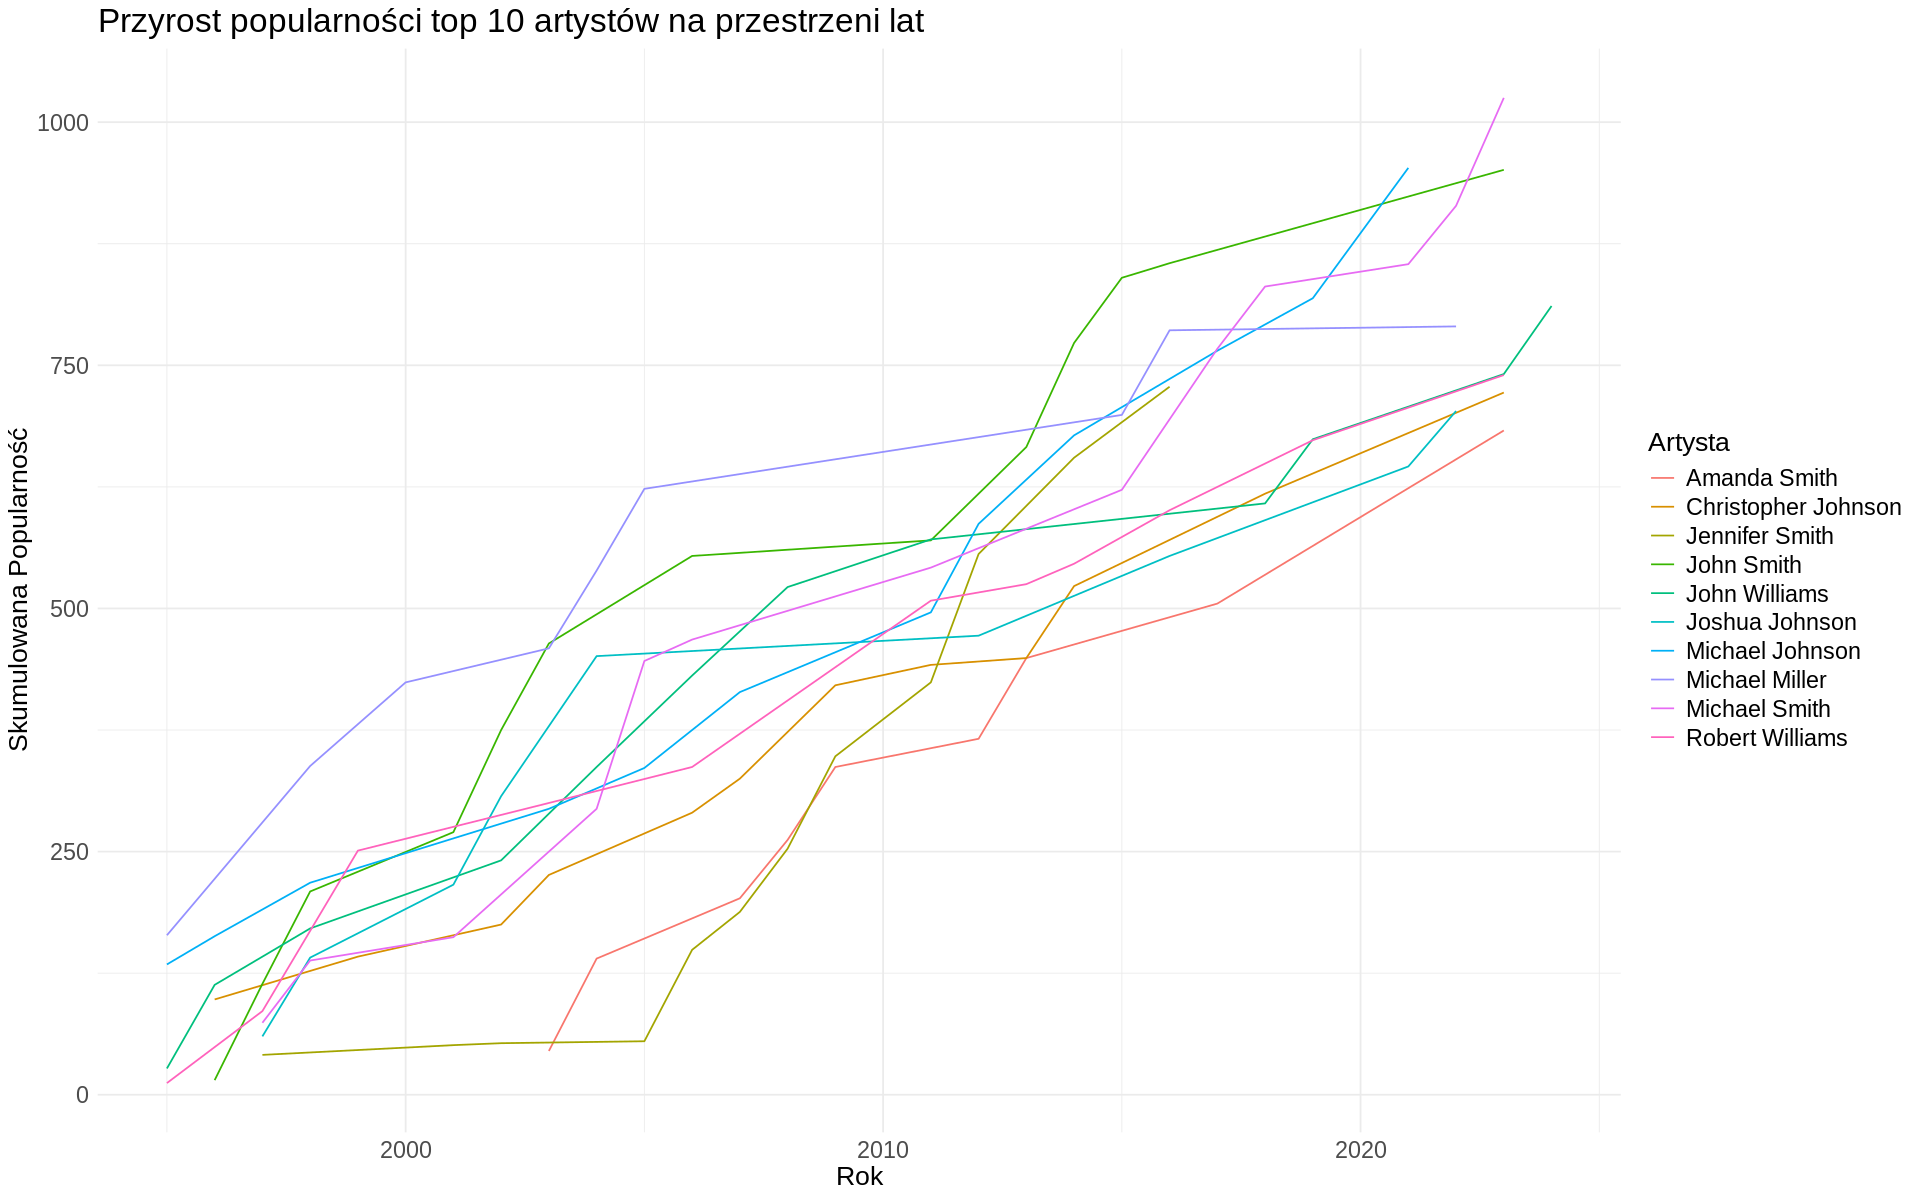

In [ ]:
# Popularności artystów top 10 na przestrzeni lat - wykres liniowy

library(dplyr)
library(ggplot2)

#Przygotowanie danych
df <- df %>%
  mutate(release_date = as.Date(release_date),
         year = format(release_date, "%Y"))


grouped <- df %>%
  group_by(year, artist) %>%
  summarise(popularity = sum(popularity, na.rm = TRUE)) %>%
  ungroup()


artist_popularity <- grouped %>%
  group_by(artist) %>%
  summarise(total_popularity = sum(popularity, na.rm = TRUE)) %>%
  arrange(desc(total_popularity)) %>%
  slice_head(n = 10)

top_artists <- artist_popularity$artist

top_data <- grouped %>%
  filter(artist %in% top_artists) %>%
  arrange(artist, year) %>%
  group_by(artist) %>%
  mutate(cumulative_popularity = cumsum(popularity)) %>%
  ungroup()

# Tworzenie wykresu liniowego
ggplot(top_data, aes(x = as.numeric(year), y = cumulative_popularity, color = artist)) +
  geom_line() +
  labs(
    title = "Przyrost popularności top 10 artystów na przestrzeni lat",
    x = "Rok",
    y = "Skumulowana Popularność",
    color = "Artysta"
  ) +
  theme_minimal()+
  theme(
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )



**Wnioski:**

* Większości artystów towarzyszył stały przyrost popularności.

* Najgwałtowniejszy skok popularności spotkał Jennifer Smith

* Natomiast w stałym tempie rozwijały się kariery: Christophera Johnsona, Roberta Wiliamsa i Michaela Johnsona.

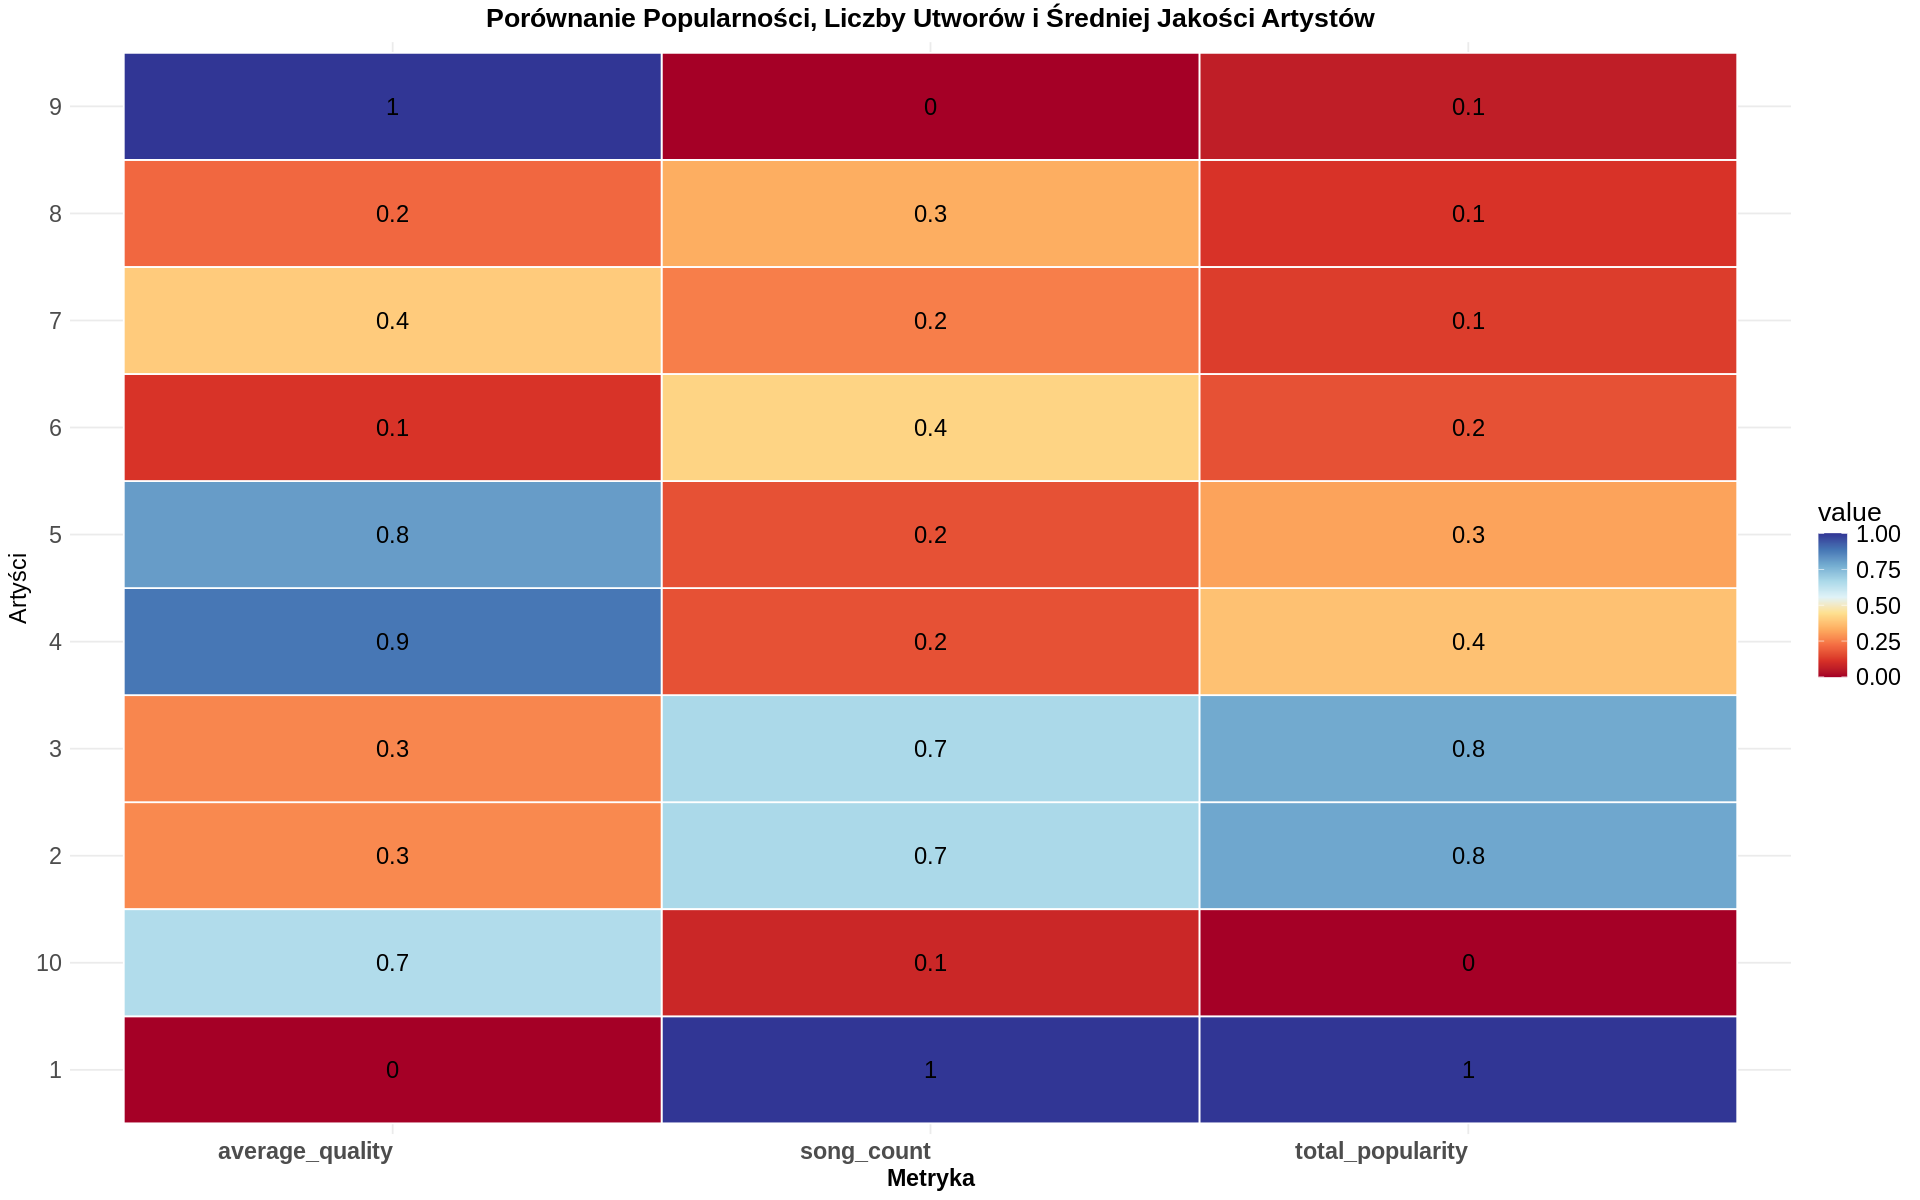

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(scales)

# Przygotowanie danych
heatmap_data <- artysci %>%
  select(artist, total_popularity, song_count, average_quality) %>%
  column_to_rownames(var = "artist")


normalized_data <- as.data.frame(lapply(heatmap_data, function(col) {
  (col - min(col)) / (max(col) - min(col))
}))
normalized_data$artist <- rownames(normalized_data)

heatmap_long <- normalized_data %>%
  pivot_longer(-artist, names_to = "metric", values_to = "value")

# Tworzenie heatmapy
ggplot(heatmap_long, aes(x = metric, y = artist, fill = value)) +
  geom_tile(color = "white", linewidth = 0.5) +
  geom_text(aes(label = round(value, 1)), color = "black", size = 5) + # Dodanie wartości
  scale_fill_gradientn(colors = scales::brewer_pal(palette = "RdYlBu")(10)) +
  labs(
    title = "Porównanie Popularności, Liczby Utworów i Średniej Jakości Artystów",
    x = "Metryka",
    y = "Artyści"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text( hjust = 1,size=14, face = "bold"),
    axis.title.x = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.y = element_text(size = 14)
  )


**Wnioski:**

* Dla części wykonawców zachodzi zależność: Im więcej piosenek, tym większa popularność.


* Ogólna zależność występująca między ilośćią wykonanych piosenek oraz średnią jakością utworów artysty to: im mniej piosenek, tym większa jakość

In [ ]:
library(dplyr)

df1 <- df %>%
  arrange(desc(popularity)) %>%
  select(artist, popularity, song_title) %>%
  filter(artist %in% artysci$artist)

# Wybranie najpopularniejszego utworu dla każdego artysty
grouped <- df1 %>%
  group_by(artist) %>%
  slice_max(order_by = popularity, n = 1) %>%
  ungroup()

grouped <- grouped %>%
  arrange(factor(artist, levels = artysci$artist))

grouped



artist,popularity,song_title
<chr>,<int>,<chr>
Michael Smith,83,Myself generation piece.
Michael Johnson,89,Factor fund.
John Smith,99,Land huge.
John Williams,96,Cold fill able.
Michael Miller,93,Media.
Michael Miller,93,Chair politics poor.
Robert Williams,92,Big condition themselves.
Jennifer Smith,99,Focus over any.
Christopher Johnson,98,Reflect dinner quality market.


**Wnioski:**

Najpopularniejsze piosenki TOP 10 artystów nie we wszystkich przypadkach przekraczają 90 pkt popularności.

#Współpraca

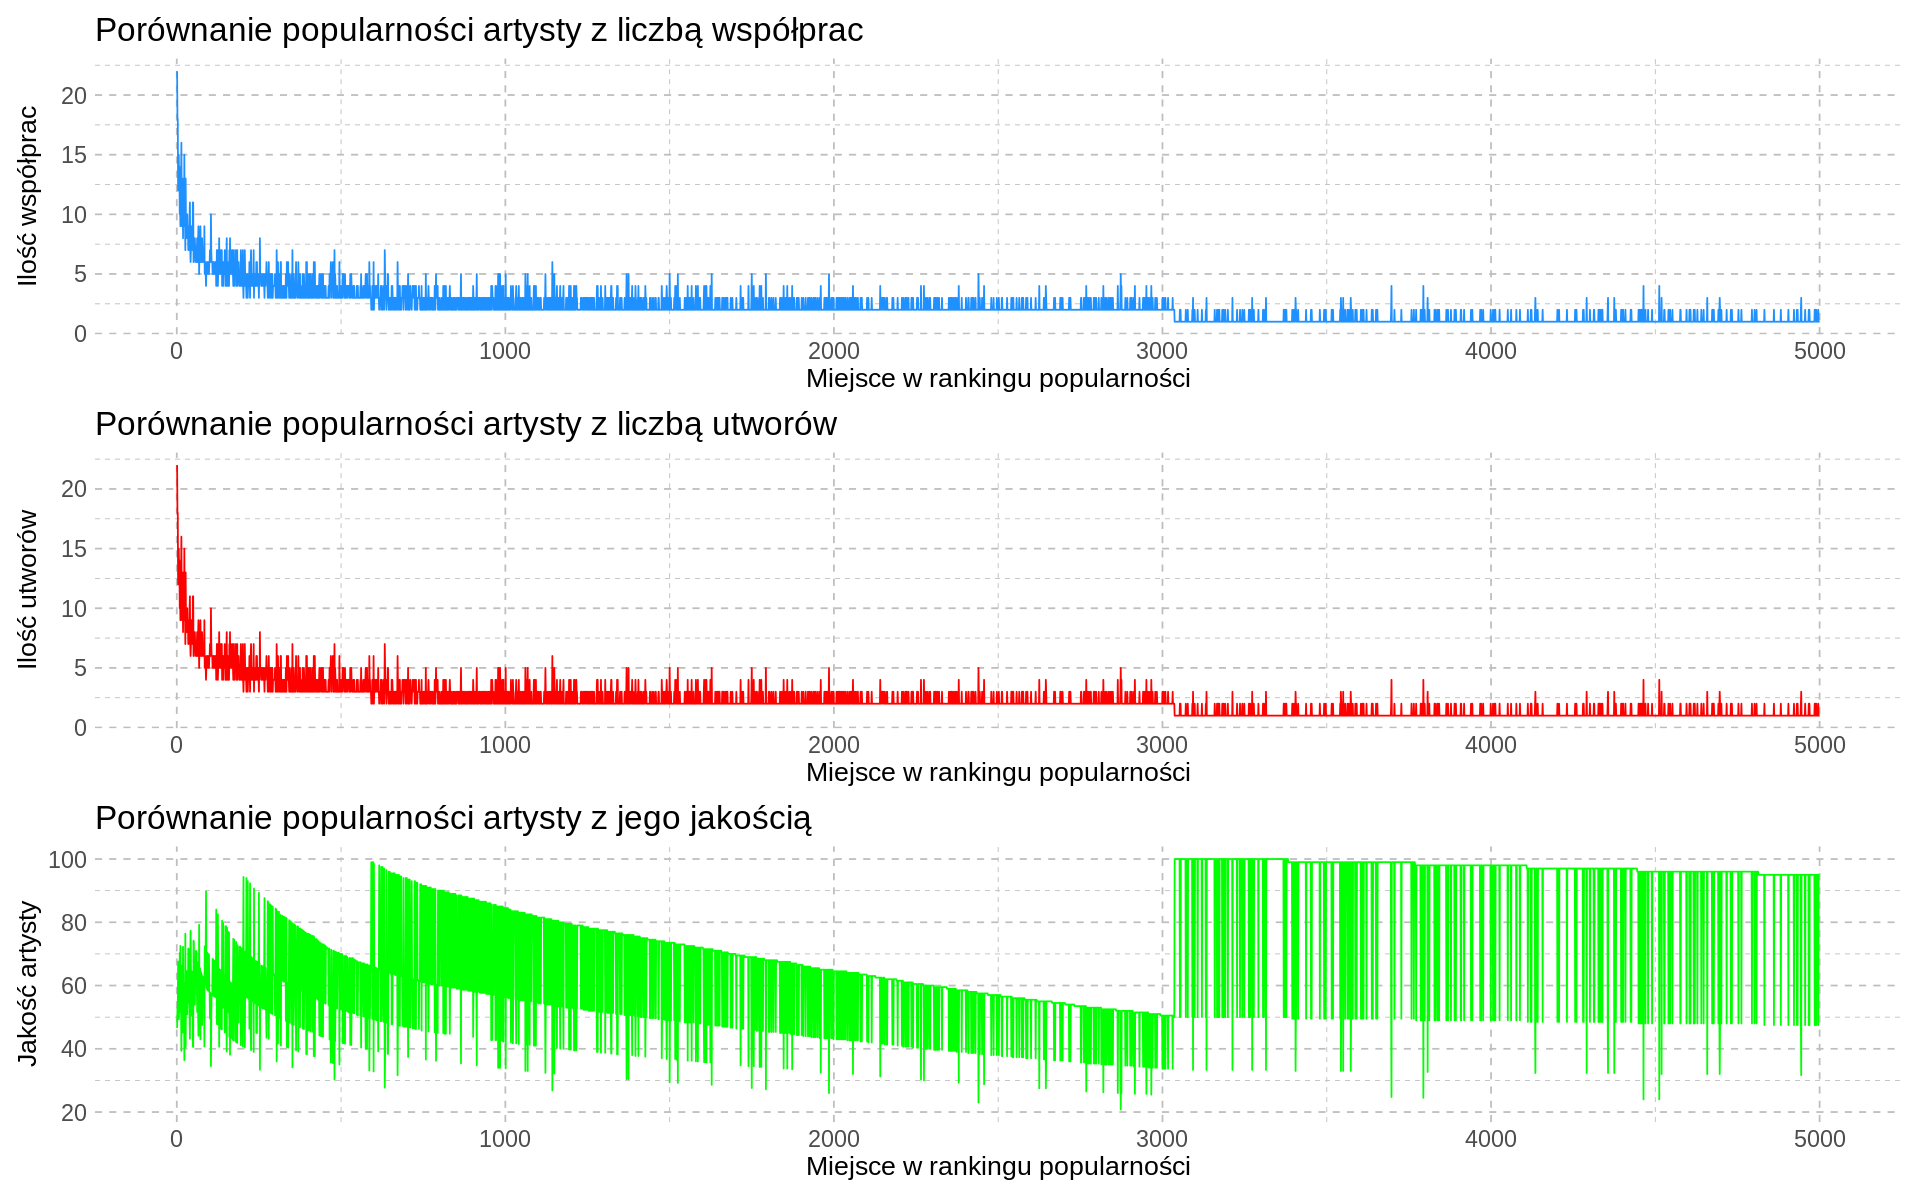

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)

# liczba obserwacji do pokazania na wykresie
num <- 5000


artist_stats_limited <- artist_stats %>%
  slice_head(n = num) %>%
  mutate(rank = row_number())



# 1. Liczba współprac
plot1 <- ggplot(artist_stats_limited, aes(x = rank, y = collaboration)) +
  geom_line(color = "dodgerblue") +
  labs(
    title = "Porównanie popularności artysty z liczbą współprac",
    x = "Miejsce w rankingu popularności",
    y = "Ilość współprac"
  ) +
  theme_minimal() +
  theme(panel.grid = element_line(linetype = "dashed", color = "gray"))+
  theme(
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

# 2. Liczba utworów
plot2 <- ggplot(artist_stats_limited, aes(x = rank, y = song_count)) +
  geom_line(color = "red") +
  labs(
    title = "Porównanie popularności artysty z liczbą utworów",
    x = "Miejsce w rankingu popularności",
    y = "Ilość utworów"
  ) +
  theme_minimal() +
  theme(panel.grid = element_line(linetype = "dashed", color = "gray"))+
  theme(
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

# 3. Jakość artysty
plot3 <- ggplot(artist_stats_limited, aes(x = rank, y = average_quality)) +
  geom_line(color = "green") +
  labs(
    title = "Porównanie popularności artysty z jego jakością",
    x = "Miejsce w rankingu popularności",
    y = "Jakość artysty"
  ) +
  theme_minimal() +
  theme(panel.grid = element_line(linetype = "dashed", color = "gray"))+
  theme(
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

library(patchwork)
(plot1 / plot2 / plot3) + plot_layout(guides = "collect")


**Wnioski:**

* Im bardziej popularny artysta tym więcej współpracuje z innymi artystami,

* Im więcej piosenek wykonuje artysta, tym jest popularniejszy

* Ilość współprac autora jest zależna od ilości wydanych piosenek, obie te wartości rosną wraz z popularnością autora

* Średnia jakość utworów artysty jest niezależna od jego popularności,

* Można zauważyć, że  od ok.1000-3500 miejsca wartość ta spada wraz z popularnością,

* Jednak az 3500 miejscem jakość artysty utrzymuje się na wysokim poziomie, może to wynikać z faktu, że autorzy ci napisali tylko 1-2 piosenki, które biły rekordy popularności, jednak nie wydali żadnych innych hitów, które mogłyby obniżyć ich jakość.

# Porównanie popularności piosenek z wulgaryzmami i bez

`summarise()` has grouped output by 'genre'. You can override using the
`.groups` argument.


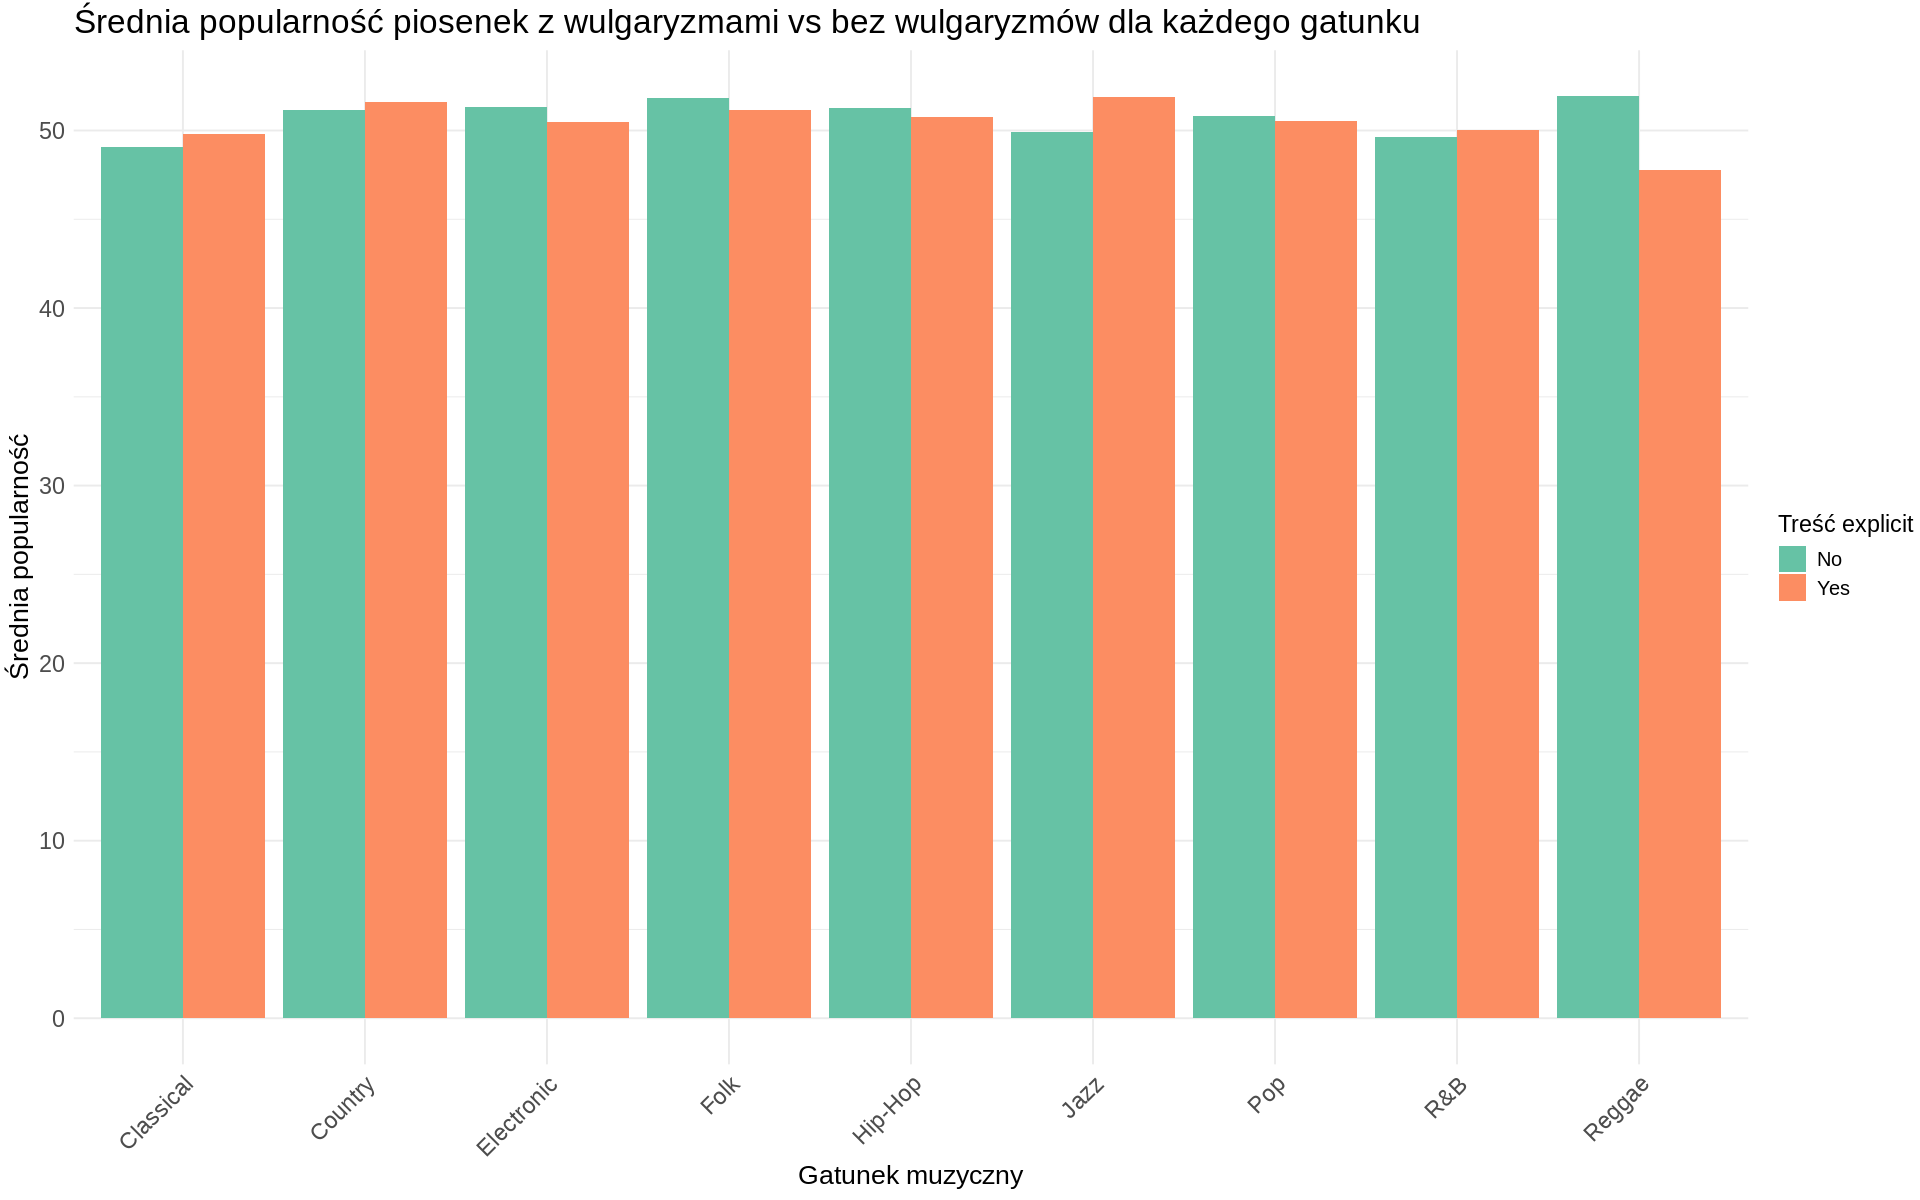

In [ ]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)

# Załóżmy, że masz dane w ramce danych 'df'
avg_popularity_by_genre <- df %>%
  group_by(genre, explicit_content) %>%
  summarise(popularity = mean(popularity, na.rm = TRUE)) %>%
  ungroup()

# Tworzenie wykresu
ggplot(avg_popularity_by_genre, aes(x = genre, y = popularity, fill = explicit_content)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = brewer.pal(3, "Set2")) +  # Kolory z palety Set2
  labs(
    title = "Średnia popularność piosenek z wulgaryzmami vs bez wulgaryzmów dla każdego gatunku",
    x = "Gatunek muzyczny",
    y = "Średnia popularność",
    fill = "Treść explicit"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    axis.text.y = element_text(size = 14),
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
  ) +
  guides(fill = guide_legend(title = "Treść explicit"))

**Wniosek:**

Wulgaryzmy w piosenkach minimalnie wpływają na popularność piosenek w poszczególnych gatunkach. W kategorii Jazz zauważalnie bardziej popularne są piosenki z wulgaryzmami, natomiast w Reggae jeszcze bardziej zauważalnie większą popularność mają piosenki bez wulgaryzmów. W pozostałyh kategoriach nie ma tak zauważalnej różnocy w popularności.

# Zależność długość piosenki a liczba streamów

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Współczynnik korelacji Pearsona: -0.00
p-value: 0.8714


`geom_smooth()` using formula = 'y ~ x'


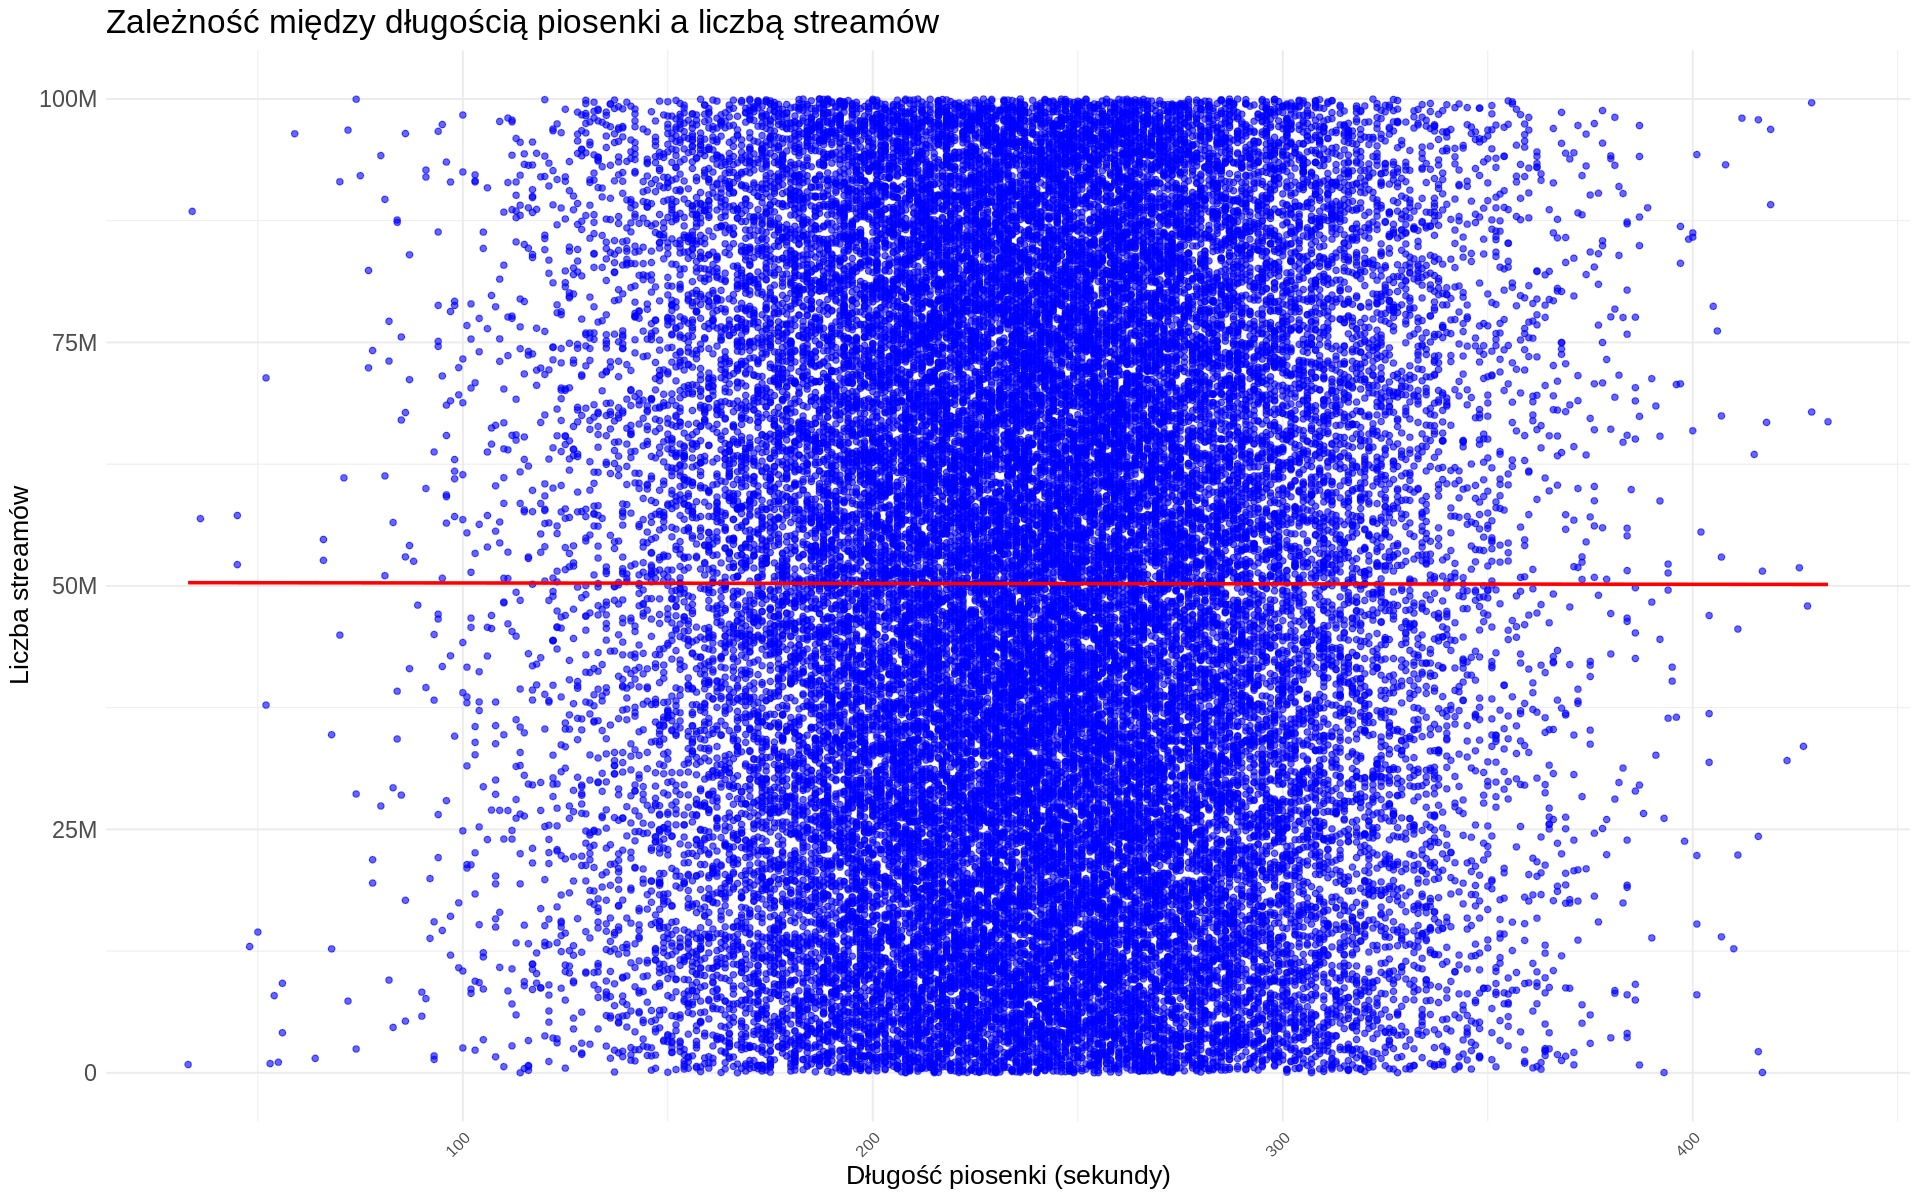

In [ ]:
library(ggplot2)
library(GGally)
library(scales)

# Załóżmy, że masz dane w ramce danych 'df'

# Obliczanie współczynnika korelacji Pearsona
correlation <- cor(df$duration, df$stream)
cat(sprintf("Współczynnik korelacji Pearsona: %.2f\n", correlation))

# Wartość p (dla testu korelacji Pearsona)
cor_test <- cor.test(df$duration, df$stream)
cat(sprintf("p-value: %.4f\n", cor_test$p.value))

# Tworzenie wykresu punktowego z linią regresji
ggplot(df, aes(x = duration, y = stream)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  scale_y_continuous(labels = function(x) {
    ifelse(x >= 1e9, paste0(round(x / 1e9, 1), "B"),
           ifelse(x >= 1e6, paste0(round(x / 1e6, 1), "M"), round(x)))
  }) +
  labs(
    title = "Zależność między długością piosenki a liczbą streamów",
    x = "Długość piosenki (sekundy)",
    y = "Liczba streamów"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 14),
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
  )

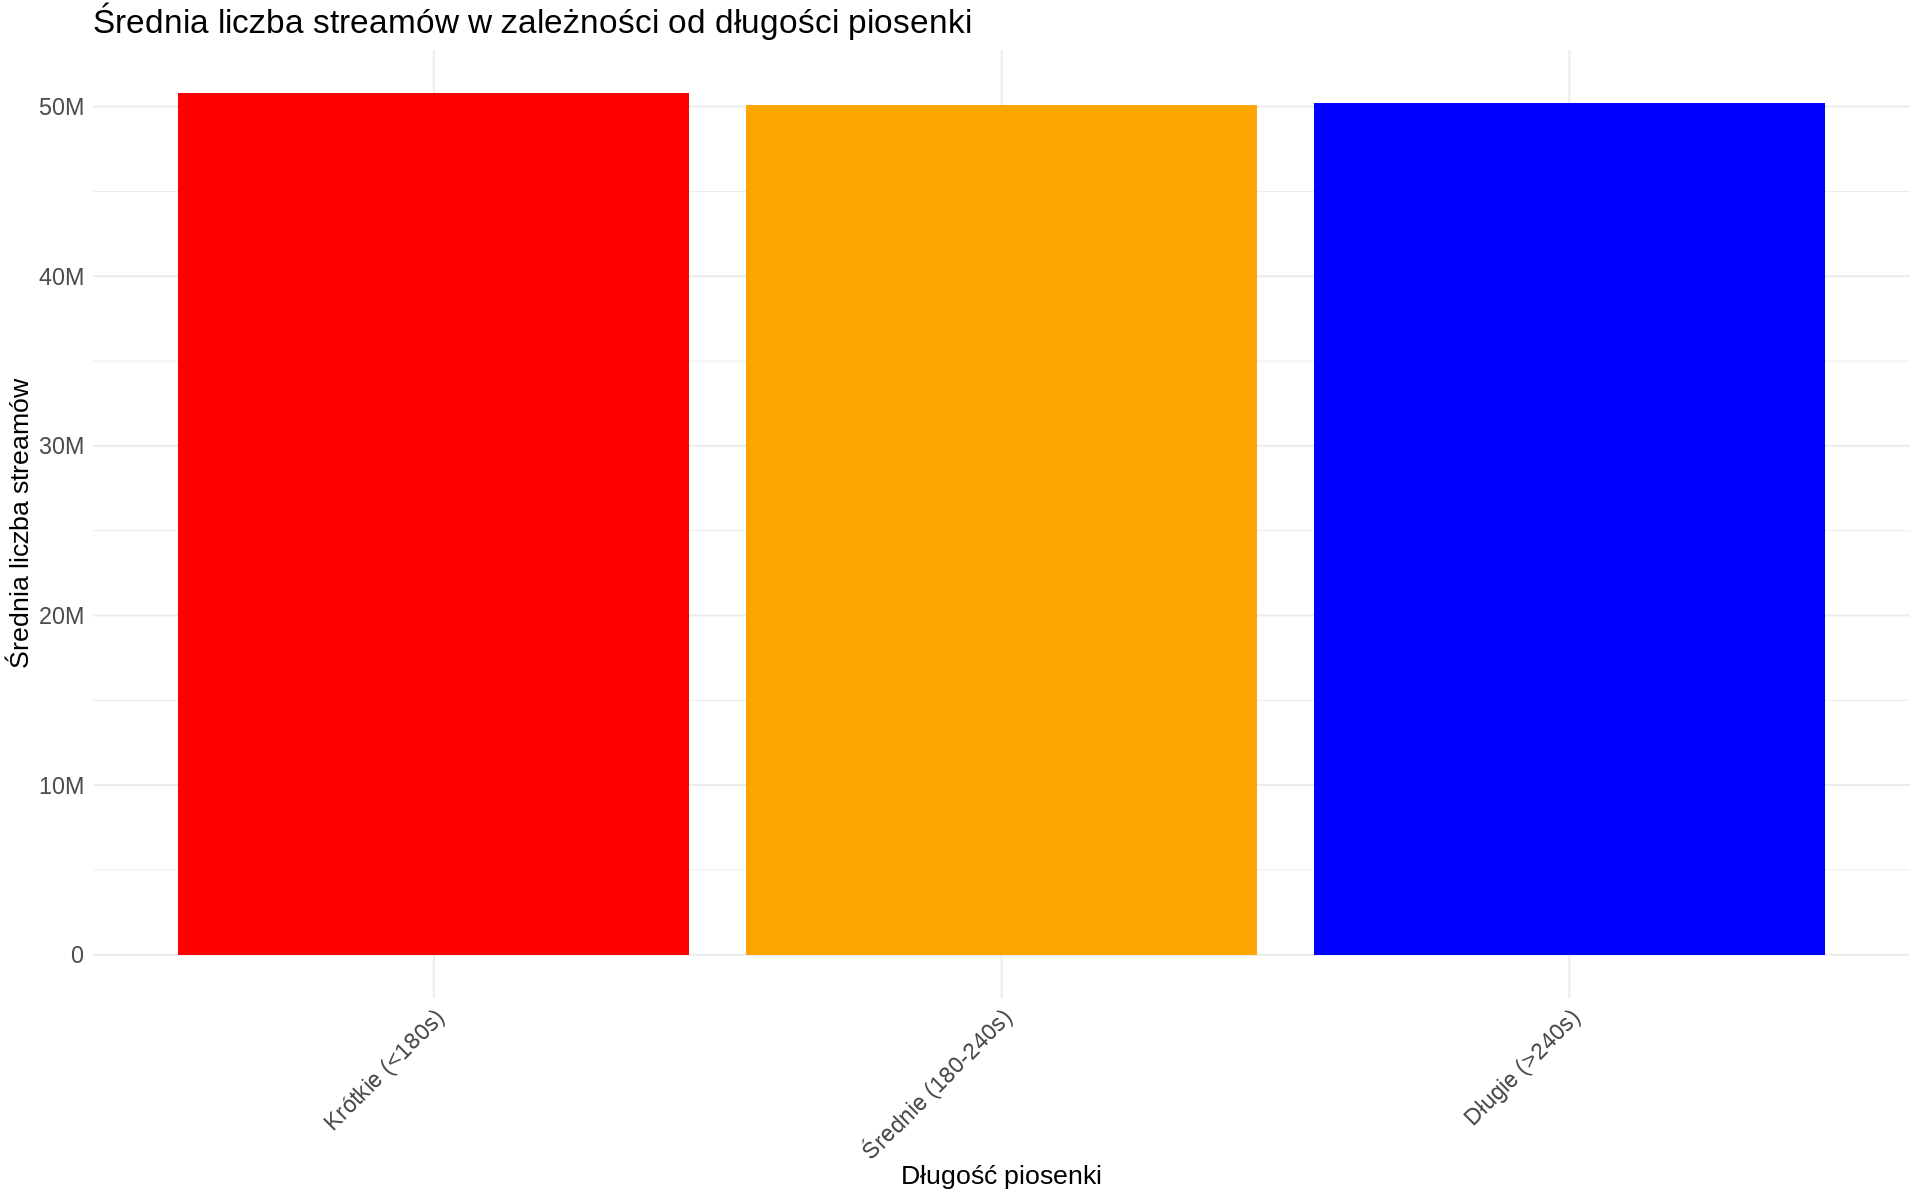

In [ ]:
library(ggplot2)
library(dplyr)
library(scales)

# Załóżmy, że masz dane w ramce danych 'df'

# Tworzenie kategorii długości piosenek
bins <- c(0, 180, 240, max(df$duration))
labels <- c("Krótkie (<180s)", "Średnie (180-240s)", "Długie (>240s)")

df$duration_category <- cut(df$duration, breaks = bins, labels = labels, include.lowest = TRUE)

# Obliczanie średniej liczby streamów w każdej kategorii
avg_streams_by_duration <- df %>%
  group_by(duration_category) %>%
  summarise(mean_streams = mean(stream, na.rm = TRUE)) %>%
  ungroup()

# Tworzenie wykresu
ggplot(avg_streams_by_duration, aes(x = duration_category, y = mean_streams, fill = duration_category)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  scale_fill_manual(values = c("red", "orange", "blue")) +  # Kolory dla różnych kategorii
  scale_y_continuous(labels = function(x) {
    ifelse(x >= 1e9, paste0(round(x / 1e9, 1), "B"),
           ifelse(x >= 1e6, paste0(round(x / 1e6, 1), "M"), round(x)))
  }) +
  labs(
    title = "Średnia liczba streamów w zależności od długości piosenki",
    x = "Długość piosenki",
    y = "Średnia liczba streamów"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
    axis.text.y = element_text(size = 14),
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
  )

**Wnioski:**

Długość piosenki nie ma znacznego wpływu na liczbę streamów. Krótkie utwory sa minimalnie częściej streamowane nić średnie i długie utwory.

# Wpływ poszczególnych wytwórni na popularność utworów

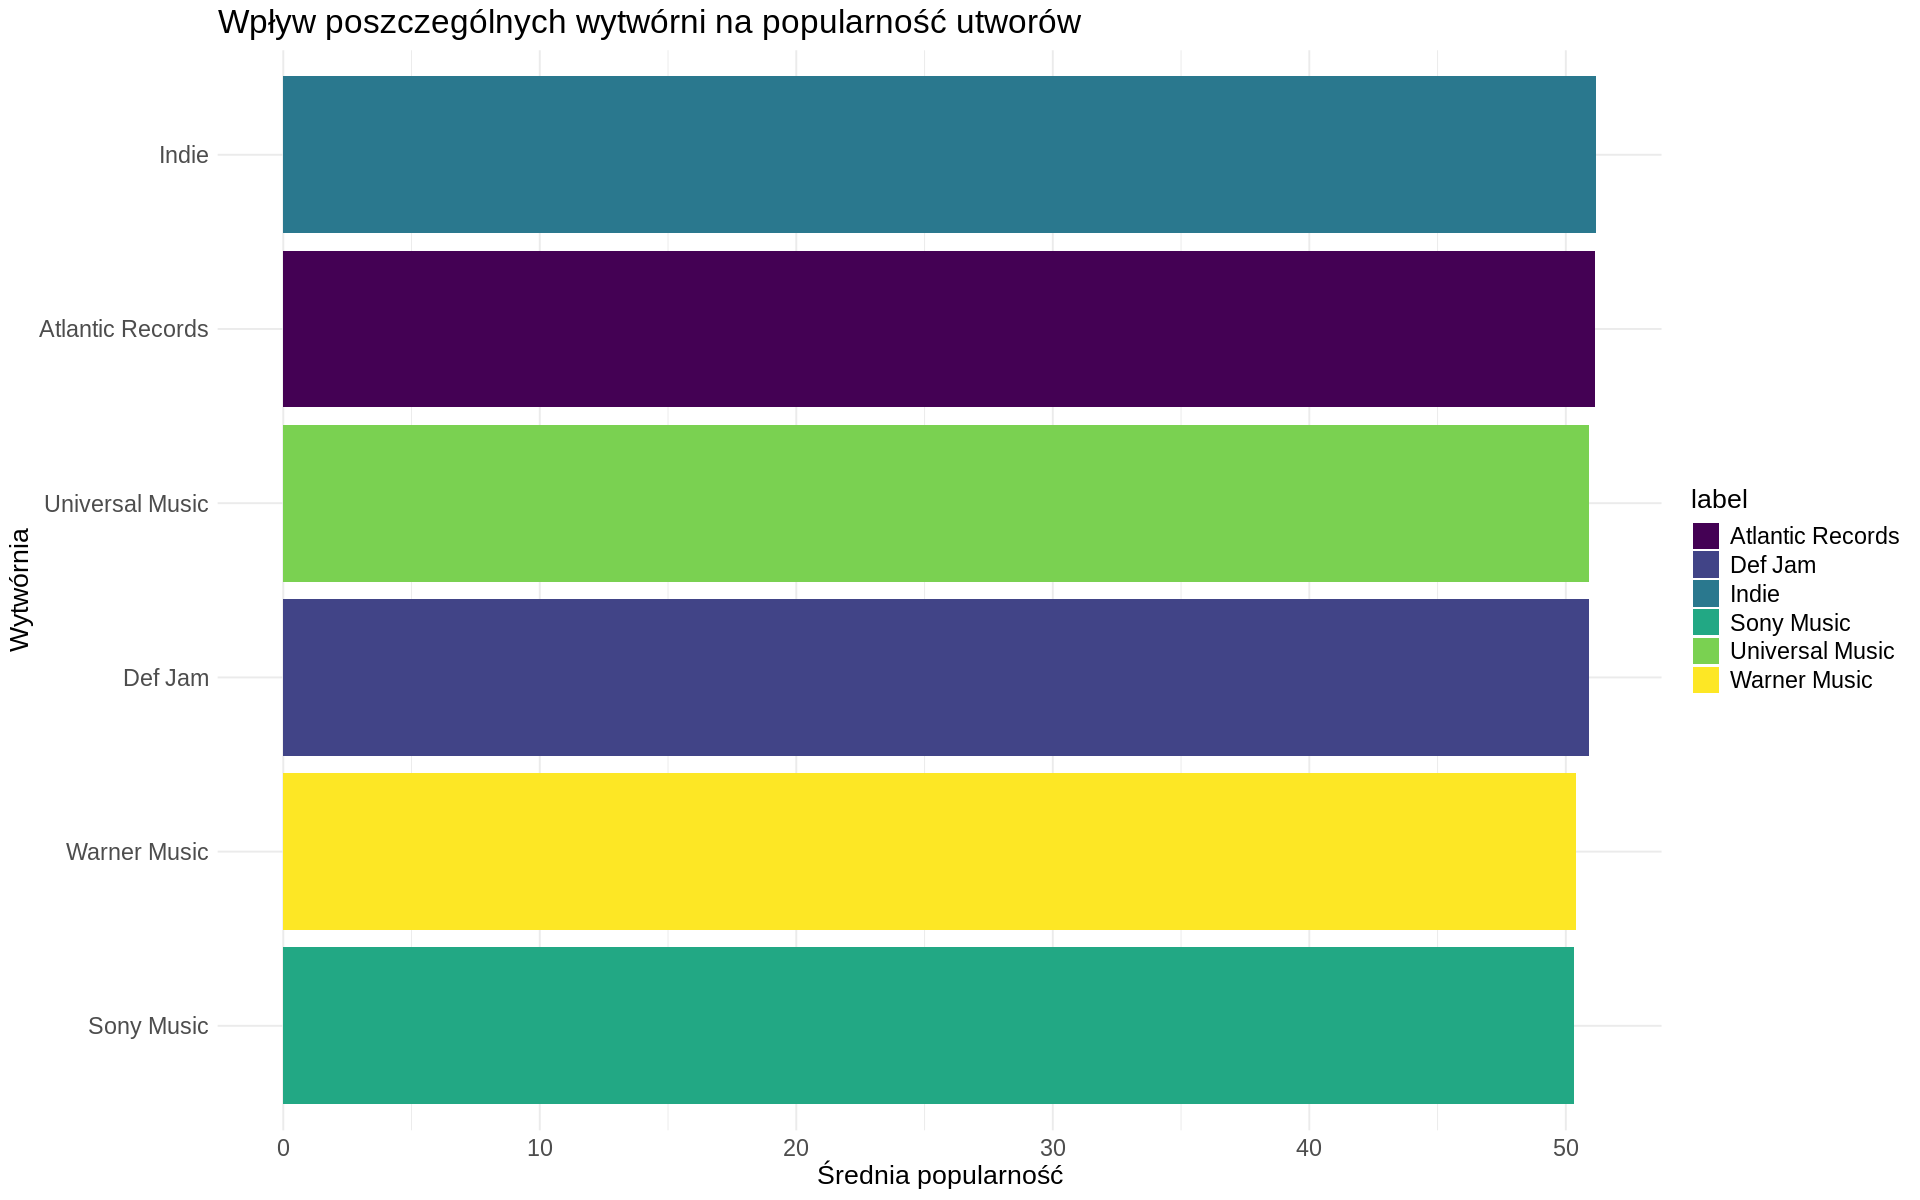

In [ ]:
library(ggplot2)
library(dplyr)

# Załóżmy, że masz dane w ramce danych 'df'

# Obliczanie średniej popularności dla każdej wytwórni
avg_popularity_by_label <- df %>%
  group_by(label) %>%
  summarise(mean_popularity = mean(popularity, na.rm = TRUE)) %>%
  ungroup()

# Sortowanie danych według popularności malejąco
avg_popularity_by_label <- avg_popularity_by_label %>%
  arrange(desc(mean_popularity))

# Tworzenie wykresu słupkowego
ggplot(avg_popularity_by_label, aes(x = mean_popularity, y = reorder(label, mean_popularity), fill = label)) +
  geom_bar(stat = "identity") +
  scale_fill_viridis_d() +  # Paleta 'viridis'
  labs(
    title = "Wpływ poszczególnych wytwórni na popularność utworów",
    x = "Średnia popularność",
    y = "Wytwórnia"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.y = element_text(size = 14),
    axis.text.x = element_text(size = 14),
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

**Wnioksi:**

Jak widać zależność popularności utworów od wytwórki, w której zostały wydane jest lekko widoczna. Największą popularnością cieszą się utwory wydane przez Indie oraz Atlantic Records, najmniejszą - Sony Music. Między Def Jam a Warner Music jest widoczna różnica w popularności.